CTD comparisons with surface wave mixing tests part 1

In [453]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
from salishsea_tools import geo_tools, tidetools, viz_tools, loadDataFRP
from matplotlib.colors import LinearSegmentedColormap
import cmocean

#the following will allow you to load loadDataFRP.py regardless of where you are running your notebook or script
import sys
sys.path.append('/ocean/eolson/MEOPAR/analysis-elise/notebooks/databases/')

import loadDataFRP as LD

import pandas as pd
from IPython.display import Image

%matplotlib inline

In [3]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid()

(40, 898, 398) 415 337 1.0
(40, 898, 398) 415 337 2.0
(40, 898, 398) 442 259 3.0
(40, 898, 398) 438 268 4.0


/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3883: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


(40, 898, 398) 434 278 5.0
(40, 898, 398) 432 281 6.0
(40, 898, 398) 430 285 7.0
(40, 898, 398) 428 289 8.0
(40, 898, 398) 427 291 9.0
(40, 898, 398) 412 291 10.0
(40, 898, 398) 443 258 11.0
(40, 898, 398) 438 268 12.0
(40, 898, 398) 434 278 13.0
(40, 898, 398) 432 281 14.1
(40, 898, 398) 432 281 14.2
(40, 898, 398) 432 287 15.0
(40, 898, 398) 432 292 16.0
(40, 898, 398) 427 291 17.0
(40, 898, 398) 415 337 18.0


In [13]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [4]:
stationdata.keys()

Index(['Station', 'Date', 'Date_UTC', 'Time_UTC_hhmmss', 'Time_UTC_DecDay',
       'LatDecDeg', 'LonDecDeg', 'LatDecDeg_surface', 'LonDecDeg_surface',
       'LatDecDeg_bottom', 'LonDecDeg_bottom', 'LatDecDeg_surf2',
       'LonDecDeg_surf2', 'LatDecDeg_Niskin', 'LonDecDeg_Niskin',
       'LatDecDeg_end', 'LonDecDeg_end', 'Sounding', 'MaxWireOut_m',
       'waveHeightEst_m', 'cloudyPct', 'filename', 'time_PDT_hhmmss',
       'time_PDT_decDay', 'time_on_PDT_hhmmss', 'time_on_PDT_decDay',
       'time_surface_PDT_hhmmss', 'time_surface_PDT_decDay',
       'time_bottom_PDT_hhmmss', 'time_bottom_PDT_decDay',
       'time_surf2_PDT_hhmmss', 'time_Niskin_PDT_hhmmss',
       'time_off_PDT_hhmmss', 'SecchiDepth_m', 'BottleLetter', 'ALS_Turb_NTU',
       'ALS_TSS_mgL', 'sb19Turb_uncorrected', 'sb19Sal', 'sb25Sal',
       'ishift_sub19', 'pStart25', 'pEnd25'],
      dtype='object')

In [5]:
stationdata[['Station','Date_UTC','Time_UTC_hhmmss','LatDecDeg','LonDecDeg']]

Station  Date_UTC Time_UTC_hhmmss  LatDecDeg   LonDecDeg
0       1.0  20170410        17:54:17  49.148333 -123.040000
1       2.0  20170410        18:05:11  49.148333 -123.040000
2       3.0  20170410        19:44:22  49.099983 -123.526600
3       4.0  20170410        20:25:40  49.100383 -123.467017
4       5.0  20170410        21:05:12  49.100583 -123.400417
5       6.0  20170410        21:40:15  49.100500 -123.375500
6       7.0  20170410        21:58:48  49.100000 -123.350000
7       8.0  20170410        22:30:56  49.100333 -123.324667
8       9.0  20170410        22:45:20  49.101500 -123.309000
9      10.0  20170531        17:19:23  49.039500 -123.259650
10     11.0  20170531        18:13:05  49.100810 -123.533720
11     12.0  20170531        18:51:36  49.101080 -123.467220
12     13.0  20170531        19:24:38  49.100370 -123.400120
13     14.1  20170531        19:50:40  49.100850 -123.375670
14     14.2  20170531        19:53:25  49.102620 -123.377670
15     15.0  20170531        20:12:26  49.110550 -123.348520
16     16.0  20170531        20:41:47  49.120700 -123.318500
17     17.0  20170531        21:01:03  49.101680 -123.308830
18     18.0  20170531        22:05:25  49.148290 -123.039280

In [8]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [9]:
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [11]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom   ...    \
2  -123.5266                NaN                NaN               NaN   ...     

   SecchiDepth_m  BottleLetter  ALS_Turb_NTU  ALS_TSS_mgL  \
2            3.0             B           2.4          8.9   

   sb19Turb_uncorrected   sb19Sal   sb25Sal  ishift_sub19  pStart25  pEnd25  
2                54.055  25.84535  25.84735             9       599    1939  

[1 rows x 43 columns]

In [41]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [359]:
f = nc.Dataset('/data/eolson/MEOPAR/SS36runs/OrcinusRuns/SMELTNewLight10d_r5/SalishSea_1h_20150407_20150416_grid_T.nc')

In [365]:
f_sals = f.variables['vosaline'][72:96,...]
f_temps = f.variables['votemper'][72:96,...]

In [67]:
def where(station):
    fig, ax = plt.subplots(figsize = (5,5))
    viz_tools.plot_coastline(ax, Bathymetry, coords = 'map')
    ax.plot(station['LonDecDeg'].values[0], station['LatDecDeg'].values[0], 'r*')

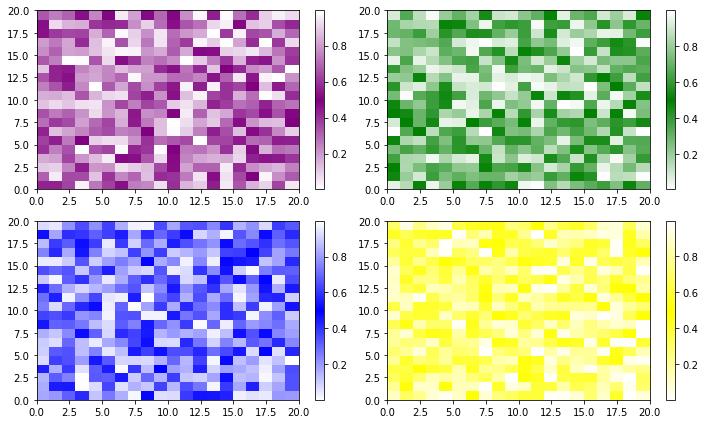

In [372]:
vmax = 1.0
cmap1 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'purple'),
                                                     (1 / vmax, 'white')])
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'blue'),
                                                     (1 / vmax, 'white')])
cmap3 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'green'),
                                                     (1 / vmax, 'white')])
cmap4 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'yellow'),
                                                     (1 / vmax, 'white')])
fig, ax = plt.subplots(2,2, figsize = (10,6))
mesh1 = ax[0,0].pcolormesh(np.random.random((20,20)), cmap = cmap1)
cbar1 = fig.colorbar(mesh1, ax=ax[0,0])
mesh1 = ax[1,0].pcolormesh(np.random.random((20,20)), cmap = cmap2)
cbar1 = fig.colorbar(mesh1, ax=ax[1,0])
mesh1 = ax[0,1].pcolormesh(np.random.random((20,20)), cmap = cmap3)
cbar1 = fig.colorbar(mesh1, ax=ax[0,1])
mesh1 = ax[1,1].pcolormesh(np.random.random((20,20)), cmap = cmap4)
cbar1 = fig.colorbar(mesh1, ax=ax[1,1])
fig.tight_layout()

In [373]:
purples = cmap1(np.linspace(0,1,7))
blues = cmap2(np.linspace(0,1,7))
greens = cmap3(np.linspace(0,1,7))
aquas = cmap4(np.linspace(0,1,7))

In [232]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom   ...    \
2  -123.5266                NaN                NaN               NaN   ...     

   SecchiDepth_m  BottleLetter  ALS_Turb_NTU  ALS_TSS_mgL  \
2            3.0             B           2.4          8.9   

   sb19Turb_uncorrected   sb19Sal   sb25Sal  ishift_sub19  pStart25  pEnd25  
2                54.055  25.84535  25.84735             9       599    1939  

[1 rows x 43 columns]

In [384]:
def compare(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,j, Xind]
                                       +(1-delta)*f_sals[before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,j, Xind]
                                        +(1-delta)*f_temps[before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
                ax[0,0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,0].plot(f_sal[11:], deptht[11:], color = aquas[n], alpha = 0.6)
                ax[0,1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,1].plot(f_temp[11:], deptht[11:], color = aquas[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, i]
                                       +(1-delta)*f_sals[before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, i]
                                        +(1-delta)*f_temps[before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
                ax[0,0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,0].plot(f_sal[11:], deptht[11:], color = aquas[n], alpha = 0.6)
                ax[0,1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,1].plot(f_temp[11:], deptht[11:], color = aquas[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
            m = m + 1
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,j, Xind]
                                       +(1-delta)*f_sals[before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,j, Xind]
                                        +(1-delta)*f_temps[before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
                ax[0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
            ax[0].plot(base_sal, deptht, color = purples[n], alpha = 0.6)
            ax[0].plot(a_sal, deptht, color = blues[n], alpha = 0.6)
            ax[0].plot(b_sal, deptht, color= greens[n], alpha = 0.6)
            ax[1].plot(base_temp, deptht, color = purples[n], alpha = 0.6)
            ax[1].plot(a_temp, deptht, color = blues[n], alpha = 0.6)
            ax[1].plot(b_temp, deptht, color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, i]
                                       +(1-delta)*f_sals[before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, i]
                                        +(1-delta)*f_temps[before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
                ax[0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
            ax[0].plot(base_sal, masked_depth, color = purples[m], alpha = 0.6)
            ax[0].plot(a_sal, masked_depth, color = blues[m], alpha = 0.6)
            ax[0].plot(b_sal, masked_depth, color= greens[m], alpha = 0.6)
            ax[1].plot(base_temp, masked_depth, color = purples[m], alpha = 0.6)
            ax[1].plot(a_temp, masked_depth, color = blues[m], alpha = 0.6)
            ax[1].plot(b_temp, masked_depth, color = greens[m], alpha = 0.6)
            m = m + 1
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if station['Date'].values == 20170410:
        min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal),
                                     np.nanmin(f_sal)]))
        max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                      np.nanmax(base_sal), np.nanmax(a_sal), 
                                      np.nanmax(b_sal), np.nanmax(f_sal)]))
        min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                     np.nanmin(base_temp),np.nanmin(a_temp), 
                                       np.nanmin(b_temp), np.nanmin(f_temp)]))
        max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                     np.nanmax(base_temp),np.nanmax(a_temp), 
                                       np.nanmax(b_temp), np.nanmax(f_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    fig.tight_layout()
    return ax

In [385]:
def compare_closest(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        if station['Date'].values == 20170410:
            f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, Xind]
                                   +(1-delta)*f_sals[before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
            f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                    +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
            ax[0,0].plot(f_sal[:11], deptht[:11], color = 'yellow', alpha = 0.6)
            ax[1,0].plot(f_sal[11:], deptht[11:], color = 'yellow', alpha = 0.6)
            ax[0,1].plot(f_temp[:11], deptht[:11], color = 'yellow', alpha = 0.6)
            ax[1,1].plot(f_temp[11:], deptht[11:], color = 'yellow', alpha = 0.6)
        ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
        ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
        ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
        ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        if station['Date'].values == 20170410:
            f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, Xind]
                                   +(1-delta)*f_sals[before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
            f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                    +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
            ax[0].plot(f_sal, deptht, color = 'yellow', alpha = 0.6)
            ax[1].plot(f_temp, deptht, color = 'yellow', alpha = 0.6)
        ax[0].plot(base_sal, deptht, color = 'purple', alpha = 0.6)
        ax[0].plot(a_sal, deptht, color = 'blue', alpha = 0.6)
        ax[0].plot(b_sal, deptht, color= 'green', alpha = 0.6)
        ax[1].plot(base_temp, deptht, color = 'purple', alpha = 0.6)
        ax[1].plot(a_temp, deptht, color = 'blue', alpha = 0.6)
        ax[1].plot(b_temp, deptht, color = 'green', alpha = 0.6)
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if station['Date'].values == 20170410:
        min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal),
                                     np.nanmin(f_sal)]))
        max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                      np.nanmax(base_sal), np.nanmax(a_sal), 
                                      np.nanmax(b_sal), np.nanmax(f_sal)]))
        min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                     np.nanmin(base_temp),np.nanmin(a_temp), 
                                       np.nanmin(b_temp), np.nanmin(f_temp)]))
        max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                     np.nanmax(base_temp),np.nanmax(a_temp), 
                                       np.nanmax(b_temp), np.nanmax(f_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    fig.tight_layout()
    return ax

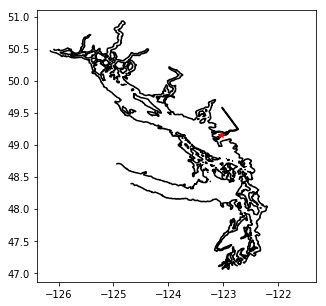

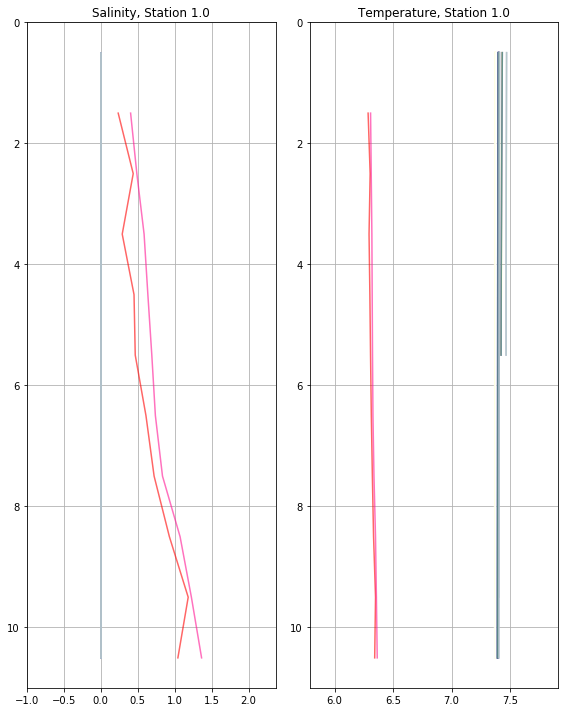

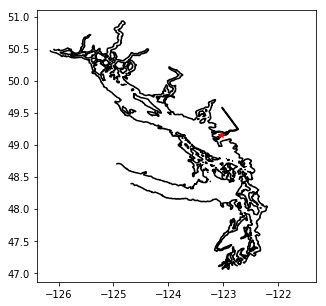

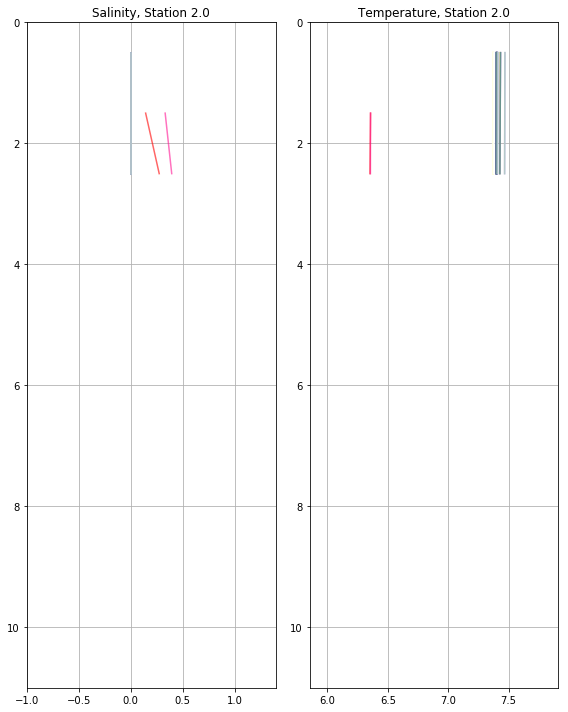

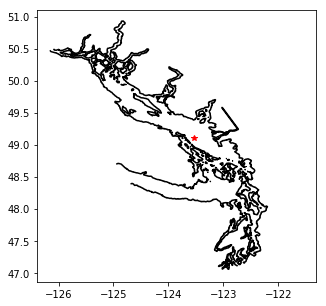

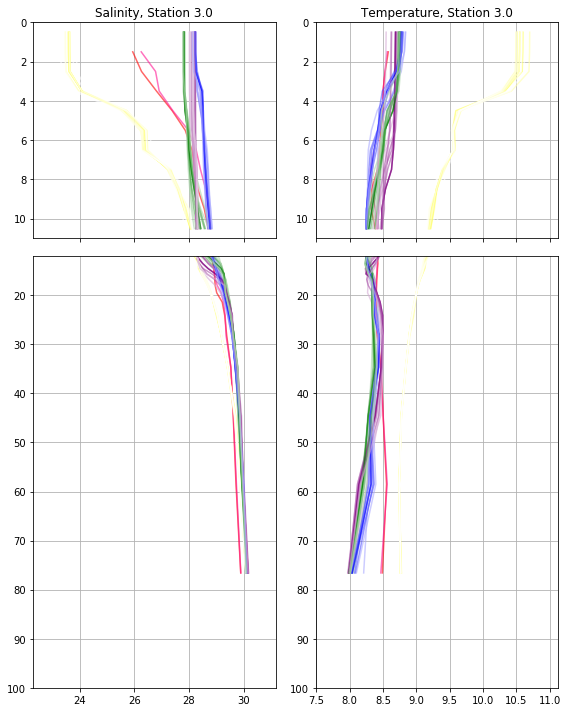

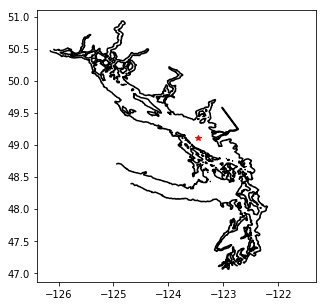

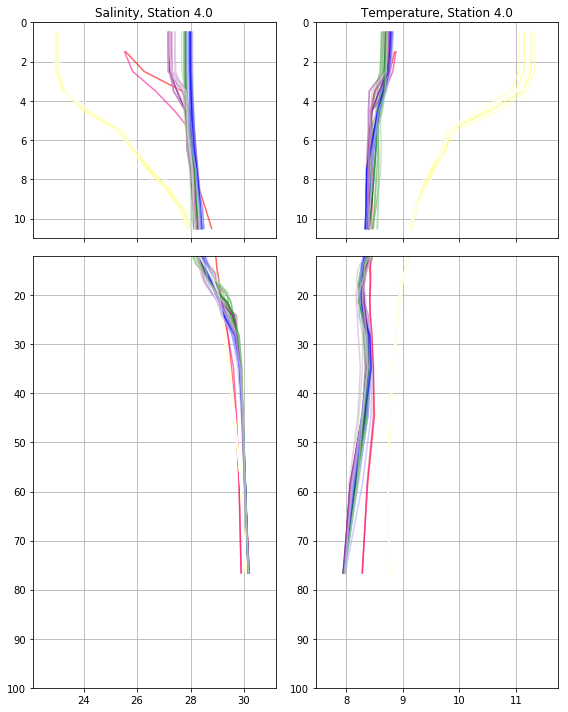

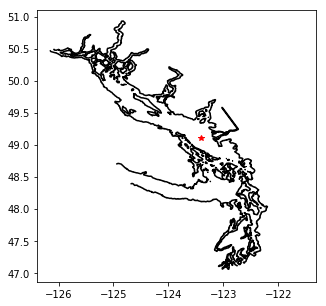

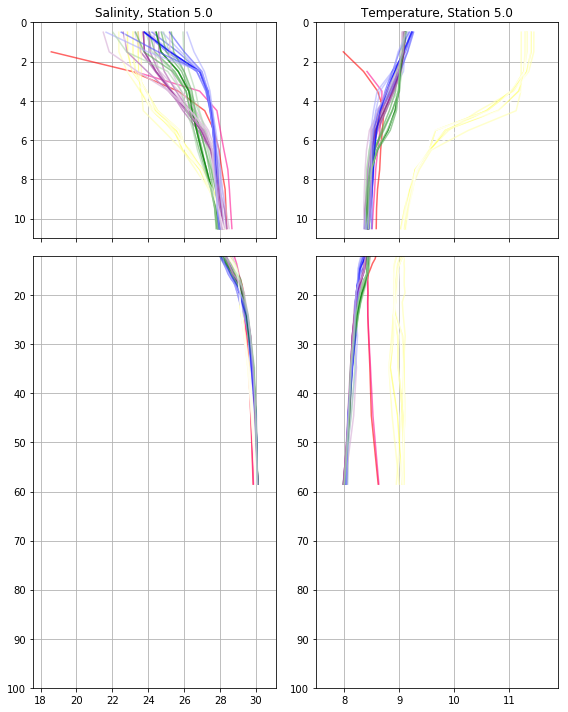

In [387]:
for n in range(5):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

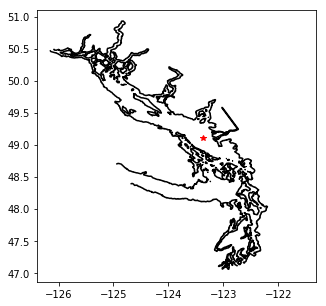

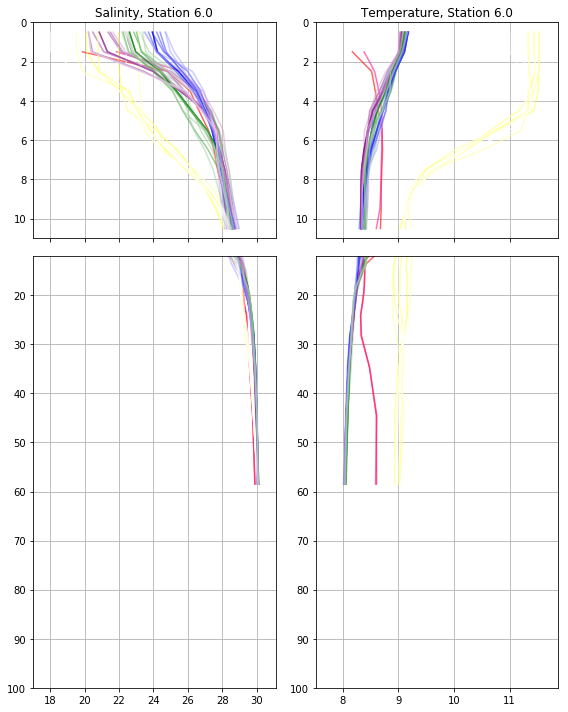

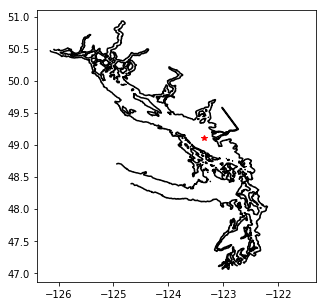

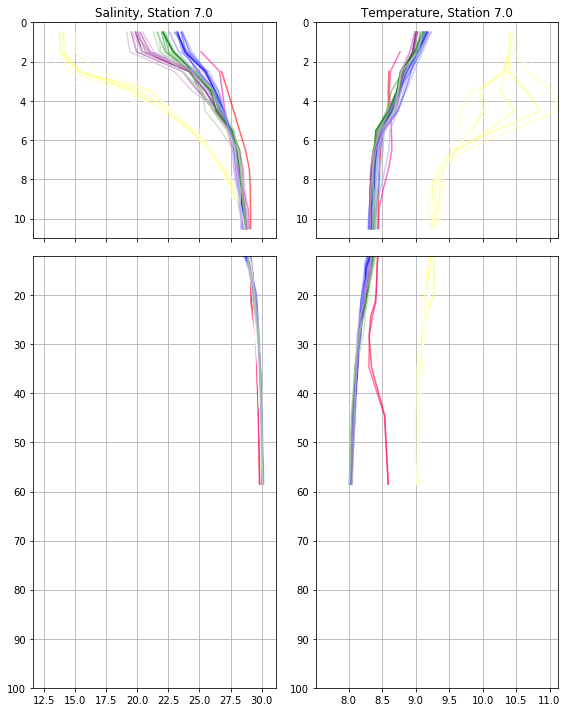

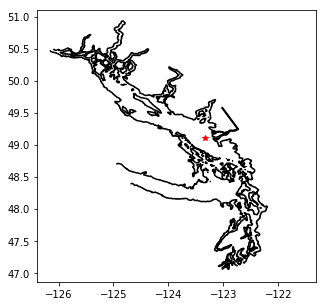

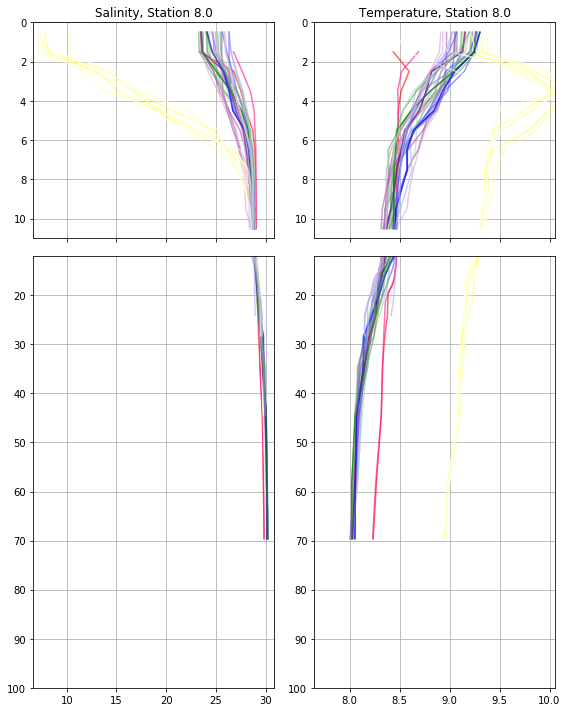

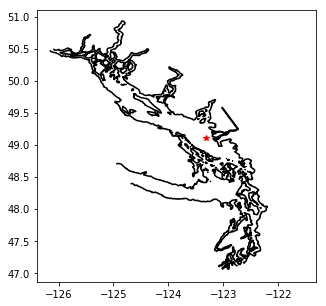

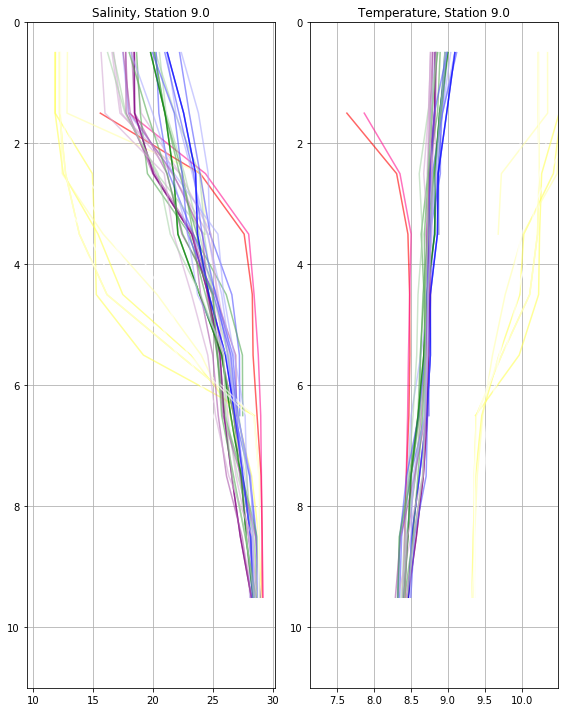

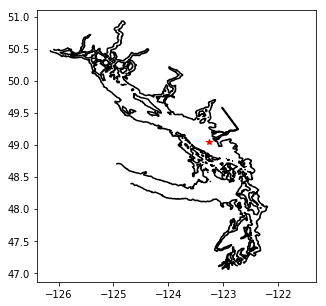

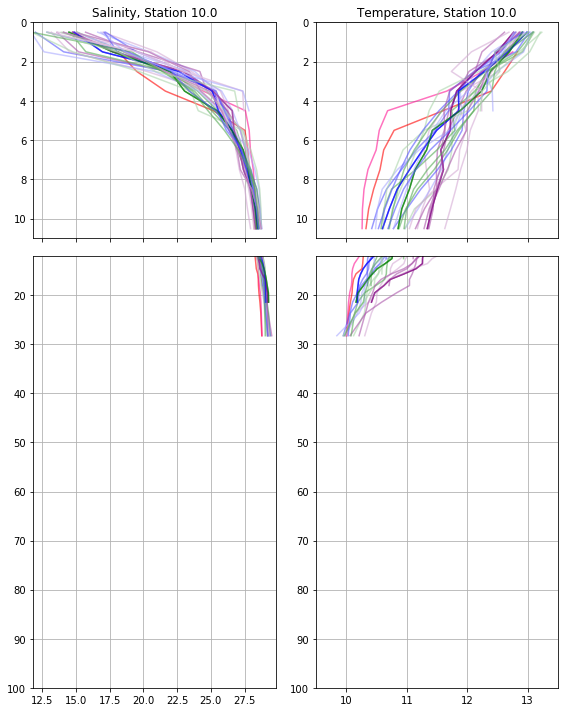

In [388]:
for n in range(5,10):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

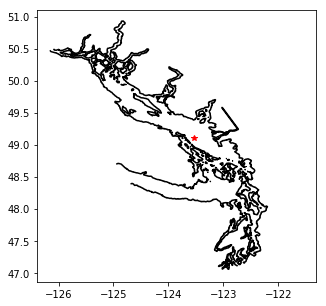

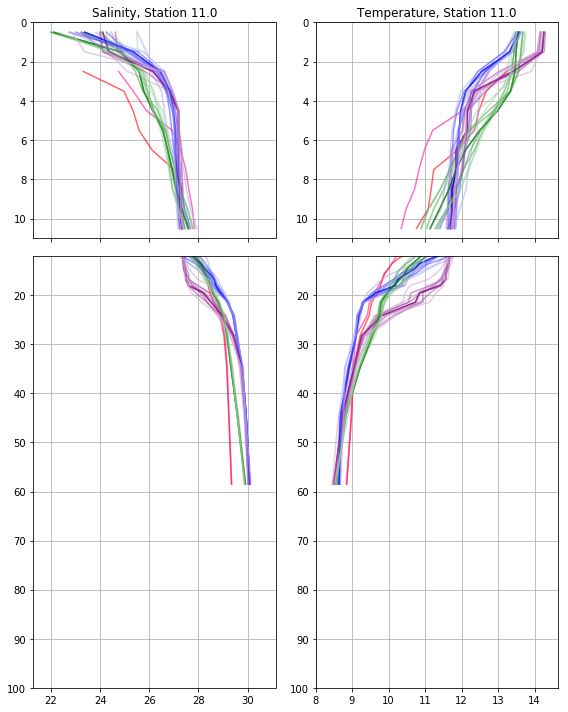

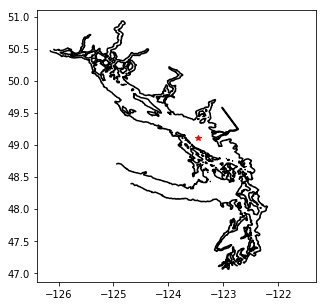

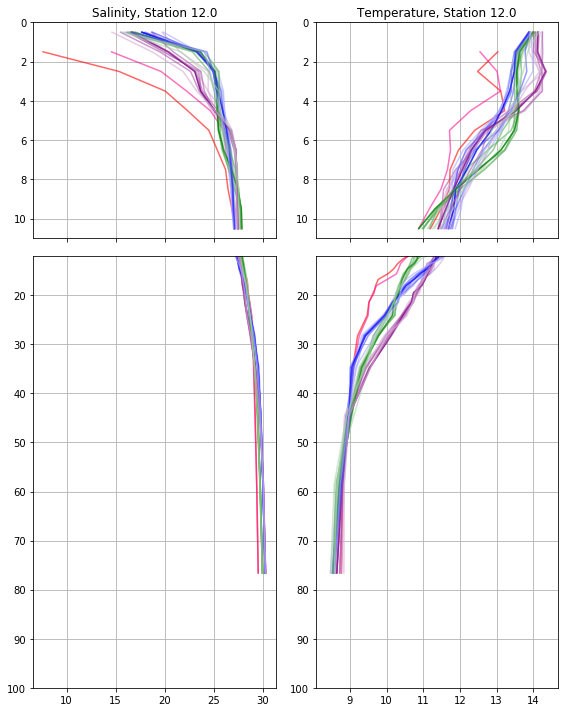

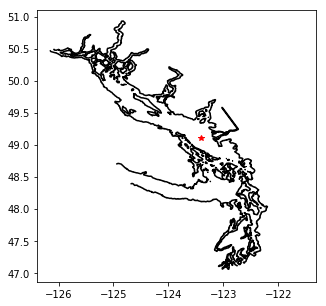

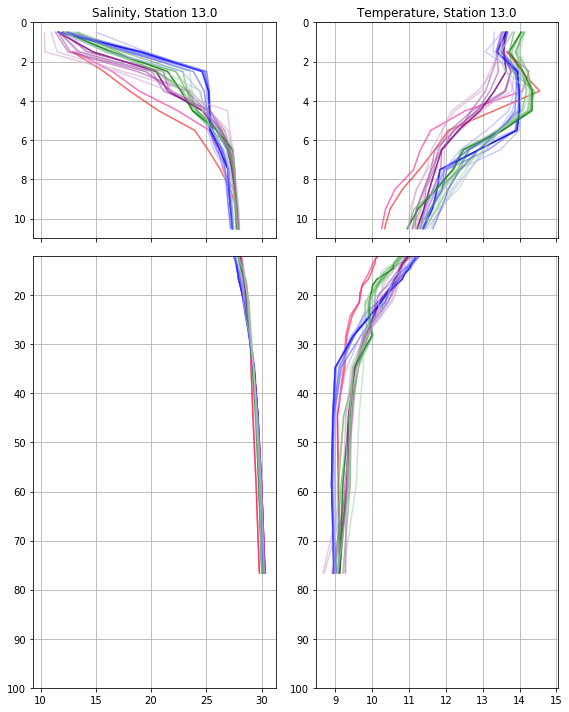

In [184]:
for n in range(10,13):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

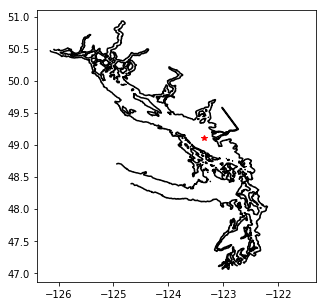

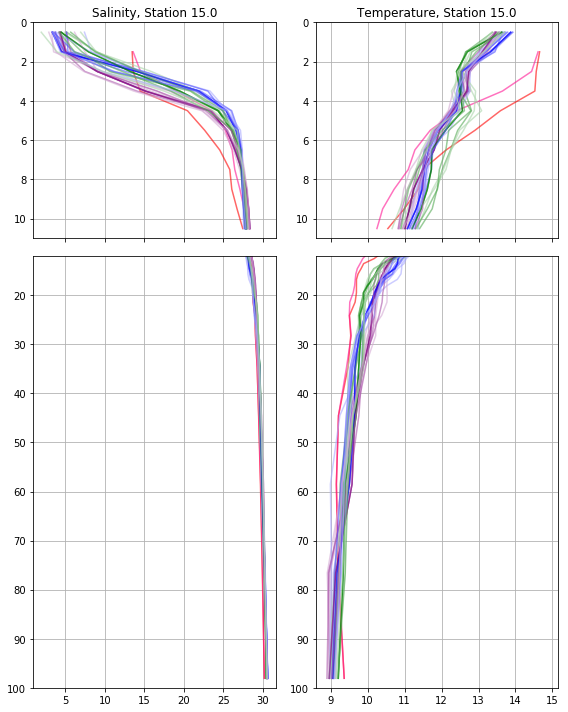

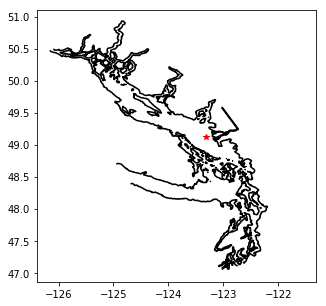

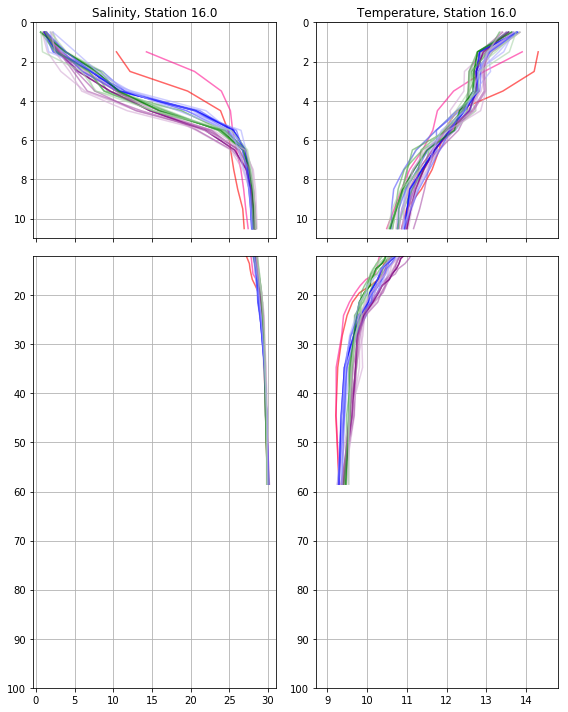

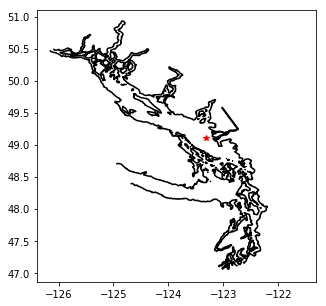

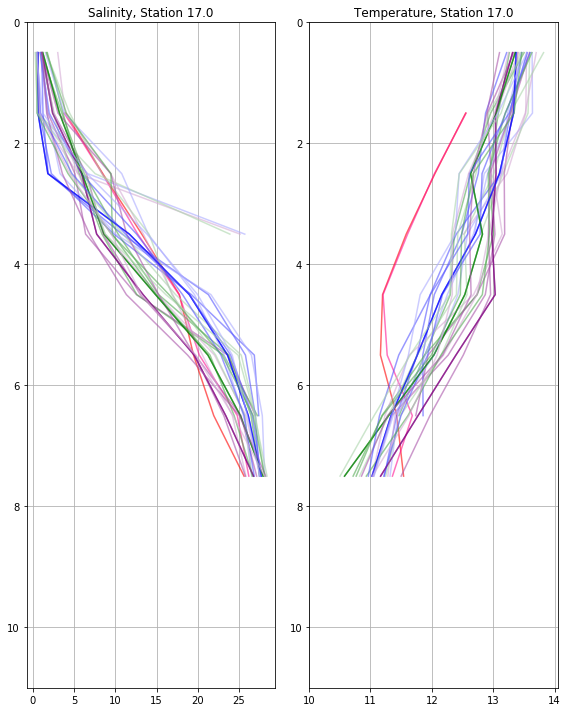

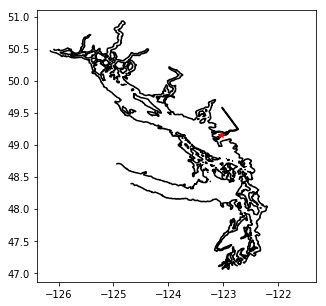

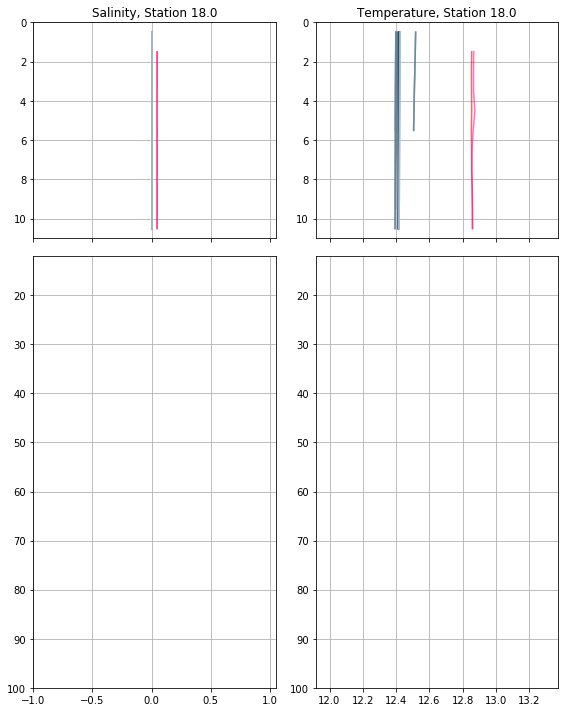

In [185]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

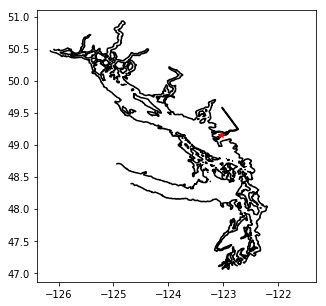

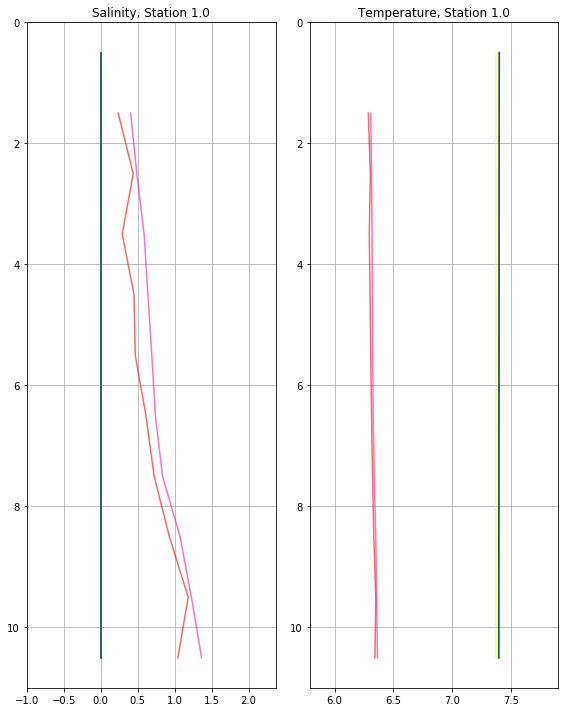

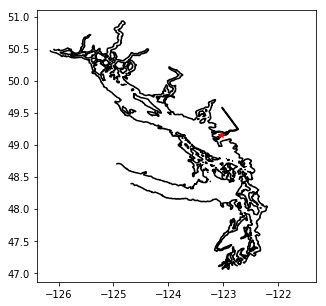

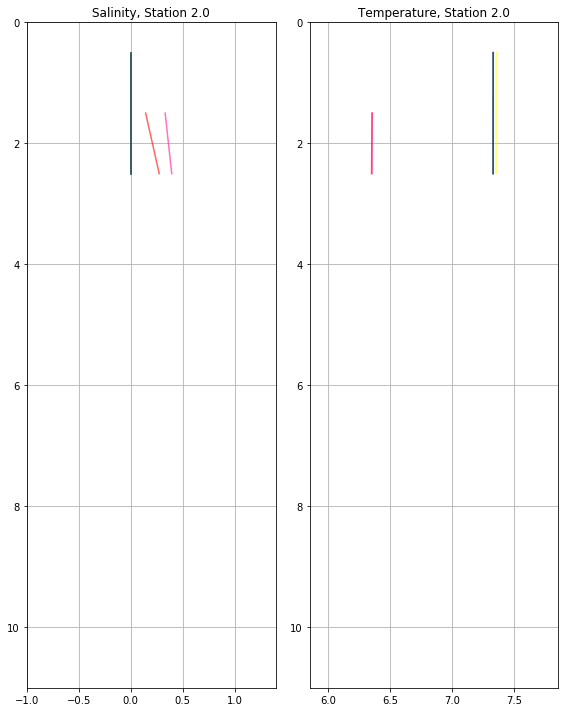

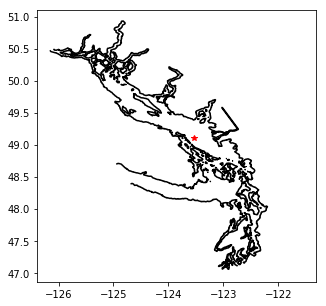

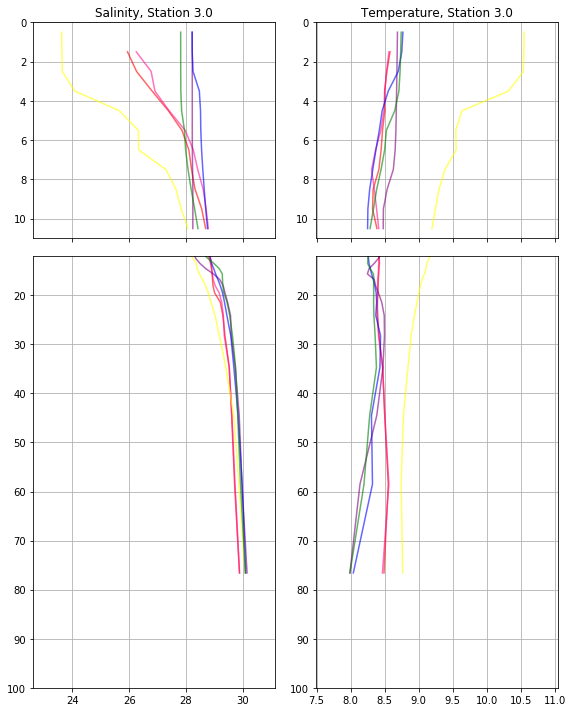

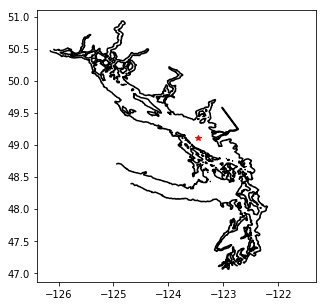

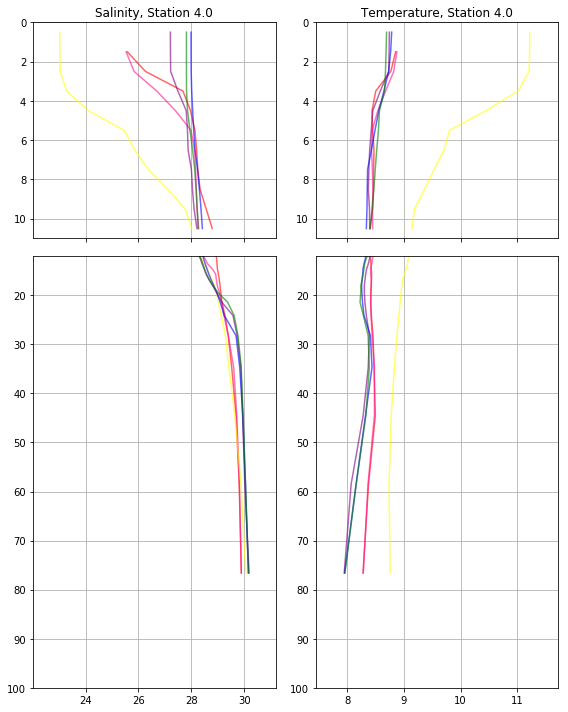

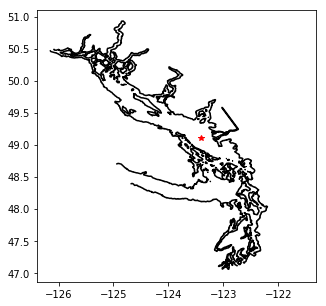

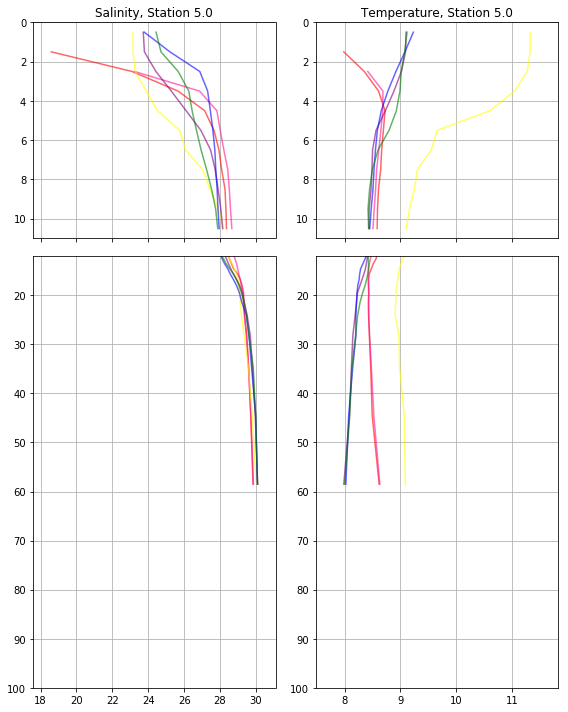

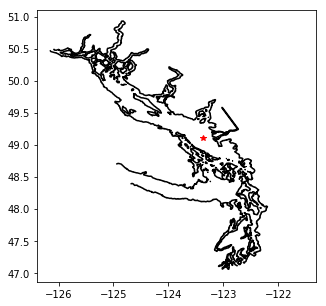

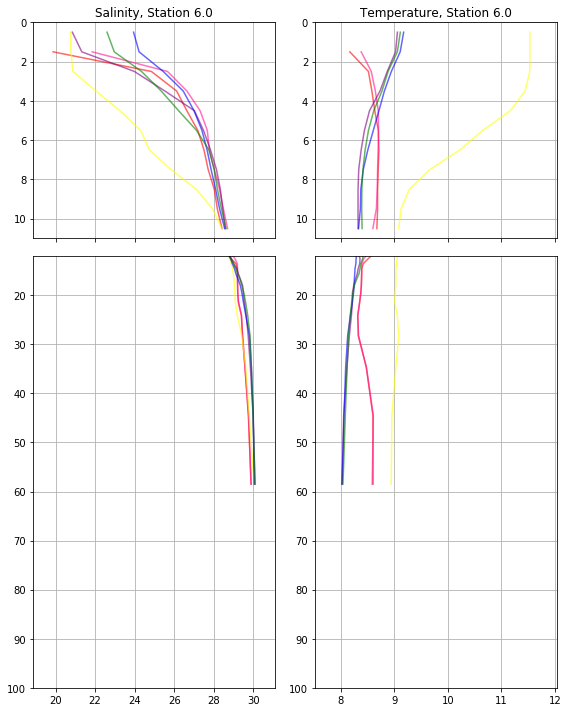

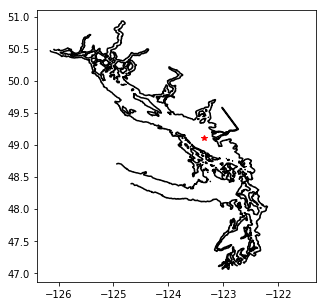

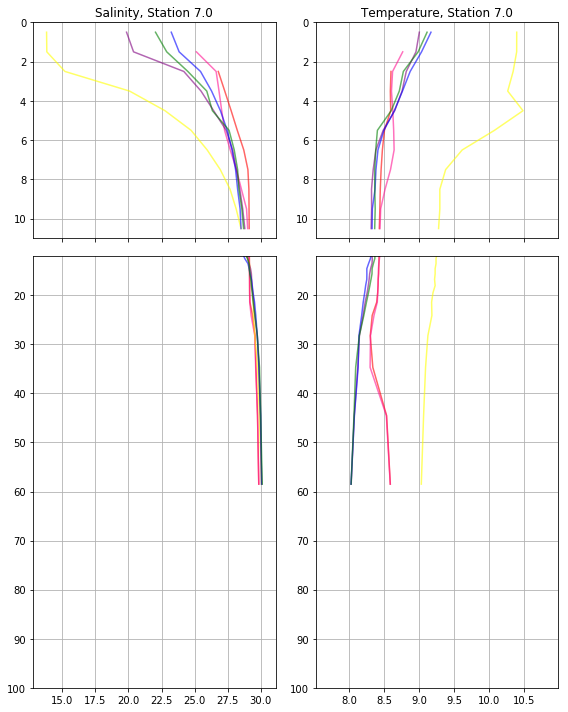

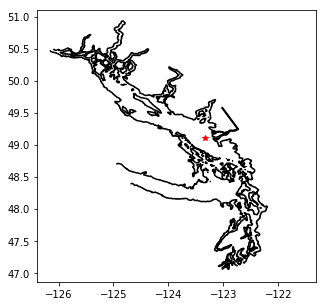

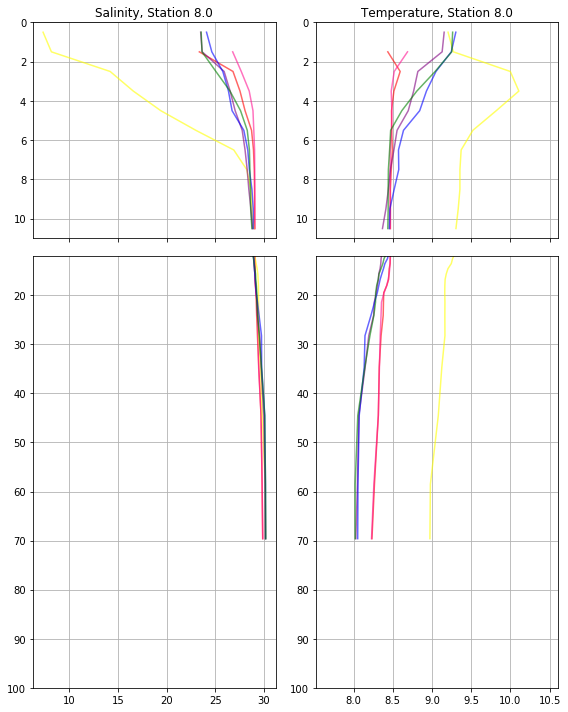

In [389]:
for n in range(8):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

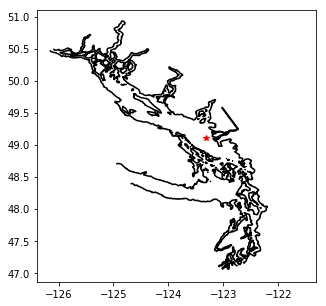

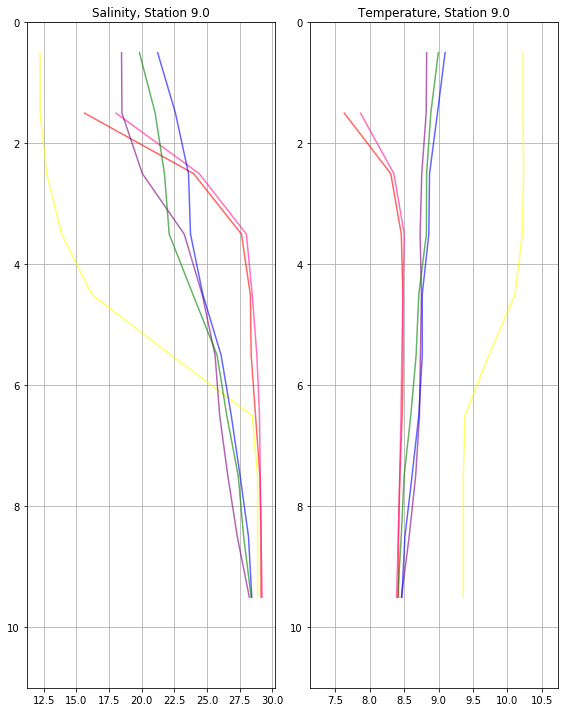

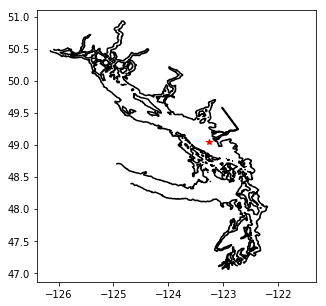

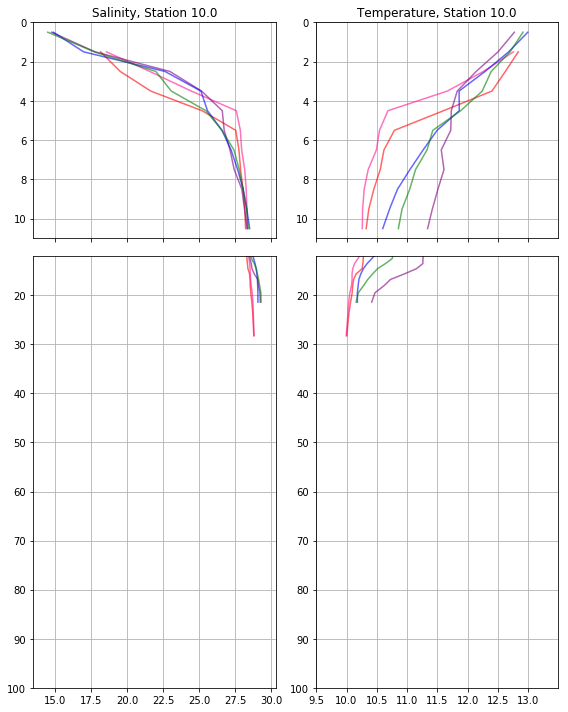

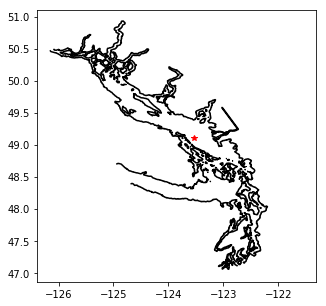

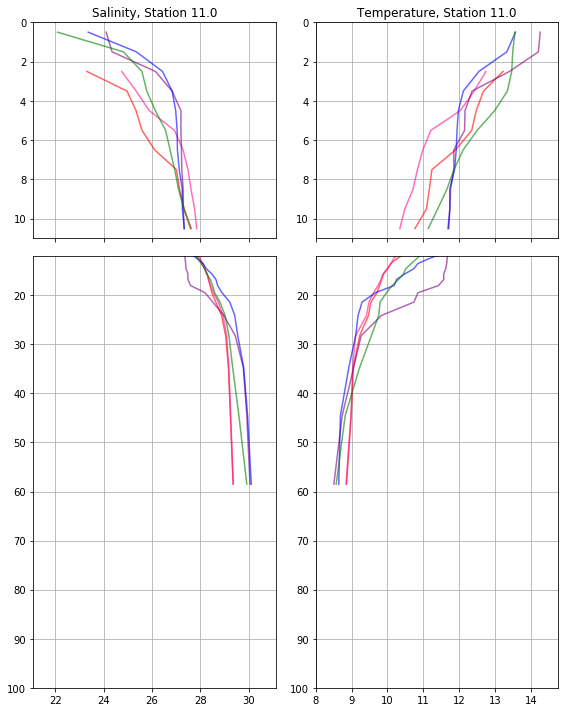

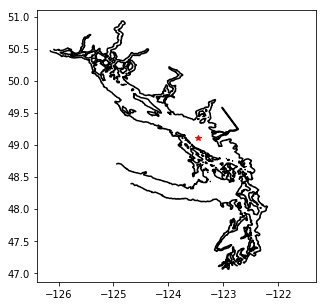

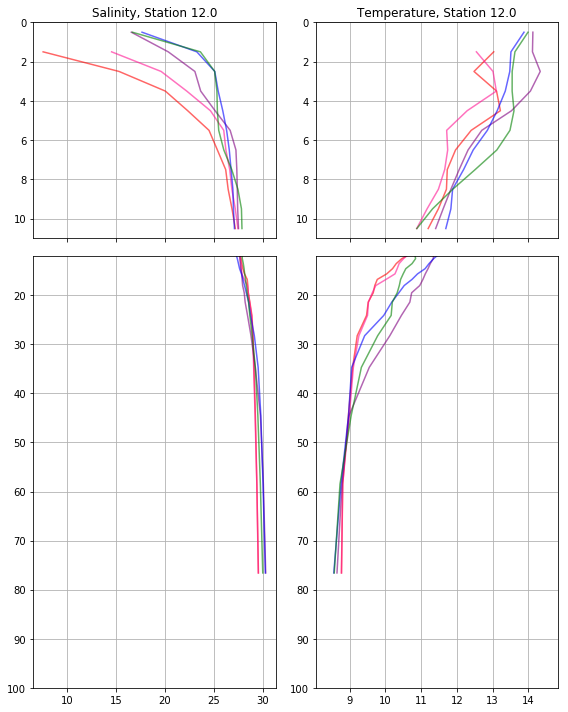

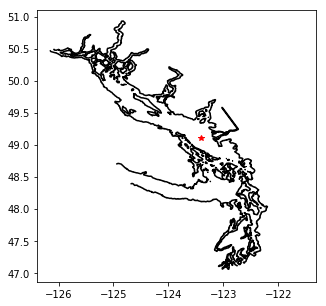

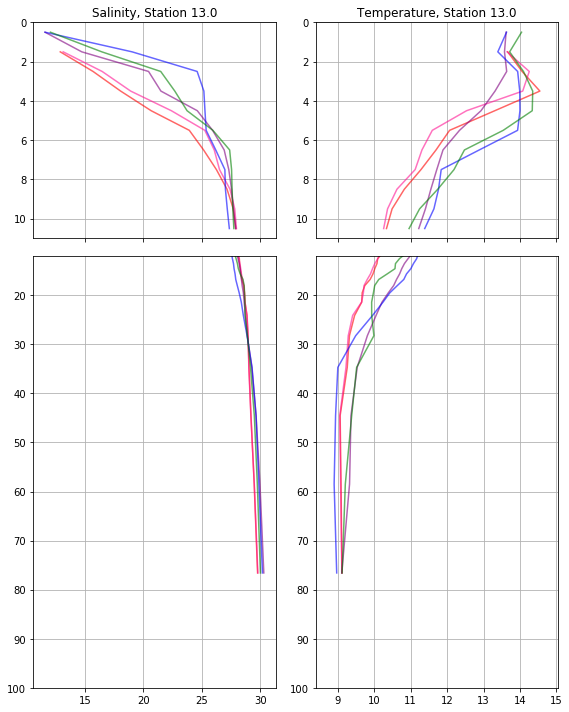

In [390]:
for n in range(8,13):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

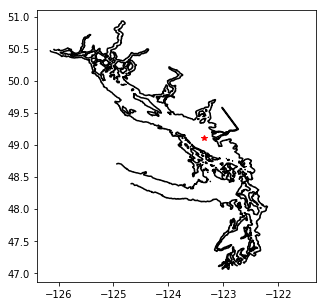

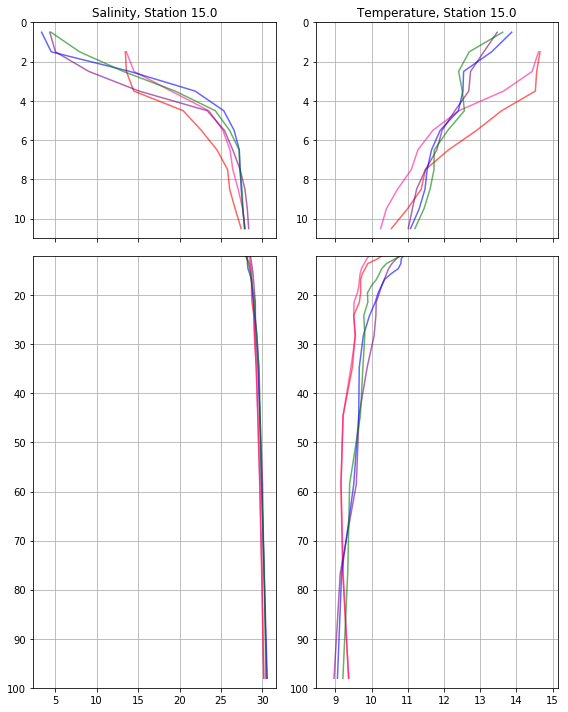

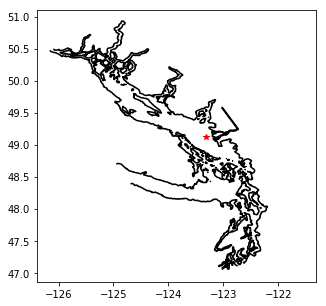

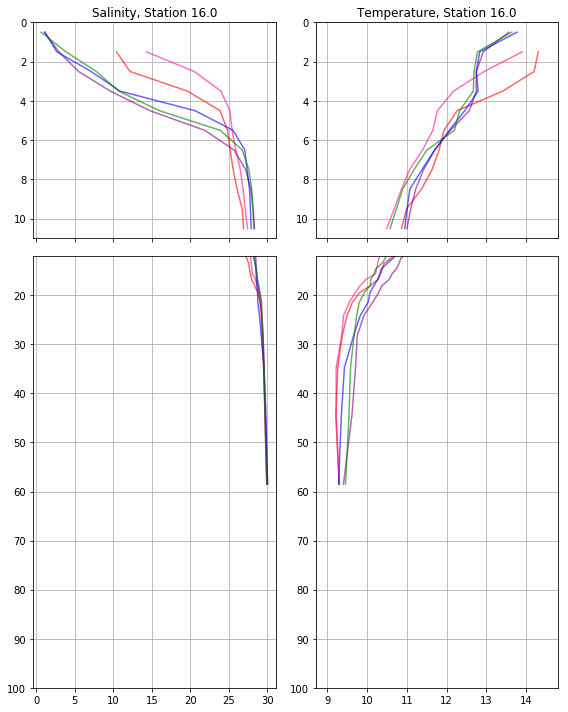

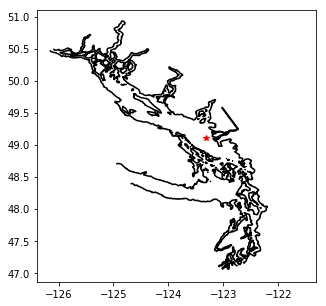

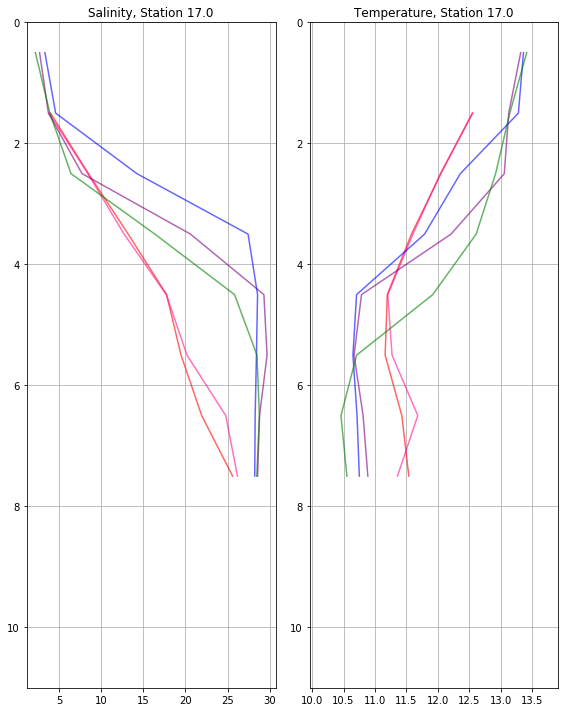

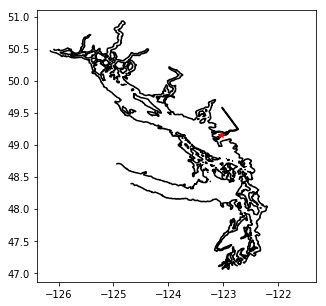

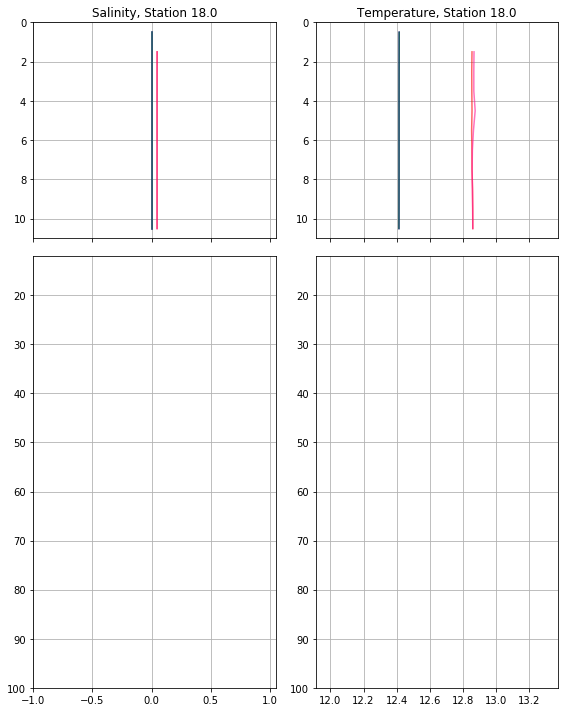

In [236]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

In [237]:
obs_sal = np.array([])
model_base_sal = np.array([])
model_a_sal = np.array([])
model_b_sal = np.array([])
obs_temp = np.array([])
model_base_temp = np.array([])
model_a_temp = np.array([])
model_b_temp = np.array([])
for n in range(19):
    if (n != 14):
        if n != 13:
            print(n)
            station = stationdata.iloc[[n]]
            cast = casts[station['Station'].values[0]]
            Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                            station['LatDecDeg'].values[0],
                                                            X, Y, land_mask = bathy.mask)
            shape_depth = cast.uCast['depth_m'].values.shape[0]
            if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
                if station['Date'].values == 20170410:
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                else: 
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

                deptht = base.variables['deptht'][:shape_depth]
                cast_sal_down = cast.dCast['gsw_srA0'].values
                cast_sal_up = cast.uCast['gsw_srA0'].values
                cast_temp_down = cast.dCast['gsw_ctA0'].values
                cast_temp_up = cast.uCast['gsw_ctA0'].values
                if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
                    delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
                else:
                    delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2])
                pt_mask = tmask[0,:shape_depth,Yind,Xind]
                m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
                m_cast_sal_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
                m_cast_temp_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
                base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                              mask = 1-pt_mask)
                a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                               mask = 1-pt_mask)
                a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                m_cast_temp_up2 = np.ma.masked_invalid(m_cast_temp_up)
                m_cast_temp_down2 = np.ma.masked_invalid(m_cast_temp_down)
                m_cast_sal_up2 = np.ma.masked_invalid(m_cast_sal_up)
                m_cast_sal_down2 = np.ma.masked_invalid(m_cast_sal_down)
                obs_sal = np.append(obs_sal, np.append(m_cast_sal_up2, m_cast_sal_down2))
                model_base_sal = np.append(model_base_sal, np.append(base_sal, base_sal))
                model_a_sal = np.append(model_a_sal, np.append(a_sal, a_sal))
                model_b_sal = np.append(model_b_sal, np.append(b_sal, b_sal))
                obs_temp = np.append(obs_temp, np.append(m_cast_temp_up2, m_cast_temp_down2))
                model_base_temp = np.append(model_base_temp, np.append(base_temp, base_temp))
                model_a_temp = np.append(model_a_temp, np.append(a_temp, a_temp))
                model_b_temp = np.append(model_b_temp, np.append(b_temp, b_temp))

0
1
2
3
4
5
6
7
8
9
10
11
12
15
16
17
18


In [238]:
station = stationdata.iloc[[13]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.dCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.dCast['gsw_srA0'].values
    cast_temp_down = cast.dCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

station = stationdata.iloc[[14]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.uCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    
    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.uCast['gsw_srA0'].values
    cast_temp_down = cast.uCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

In [239]:
m_obs_sal = np.ma.masked_invalid(obs_sal)
m_obs_temp = np.ma.masked_invalid(obs_temp)

In [240]:
m_model_base_sal = np.ma.masked_array(model_base_sal, mask = m_obs_sal.mask)
m_model_a_sal = np.ma.masked_array(model_a_sal, mask = m_obs_sal.mask)
m_model_b_sal = np.ma.masked_array(model_b_sal, mask = m_obs_sal.mask)
m_model_base_temp = np.ma.masked_array(model_base_temp, mask = m_obs_temp.mask)
m_model_a_temp = np.ma.masked_array(model_a_temp, mask = m_obs_temp.mask)
m_model_b_temp = np.ma.masked_array(model_b_temp, mask = m_obs_temp.mask)

# Sallinity, base case

In [241]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_base_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_base_sal - m_obs_sal)**2) / len(m_model_base_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_base_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_base_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  -0.179067605553
RMSE = 2.74499088507
Willmott = 0.967030483776


# Salinity, test a

In [242]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_a_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_a_sal - m_obs_sal)**2) / len(m_model_a_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_a_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_a_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  0.0663964127879
RMSE = 2.87407951488
Willmott = 0.963037589484


# Salinity, test b

In [243]:
print('bias =  ' + str(-np.mean(m_obs_sal) + np.mean(m_model_b_sal)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_b_sal - m_obs_sal)**2) / len(m_model_b_sal))))
xbar = np.mean(m_obs_sal)
print('Willmott = ' + str(1-(np.sum((m_model_b_sal - m_obs_sal)**2)  / 
                             np.sum((np.abs(m_model_b_sal - xbar) + np.abs(m_obs_sal - xbar))**2))))

bias =  -0.0345804636635
RMSE = 2.73790464924
Willmott = 0.966609902131


# Temperature, base case

In [244]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_base_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_base_temp - m_obs_temp)**2) / len(m_model_base_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_base_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_base_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.33957445949
RMSE = 11.9332589298
Willmott = 0.477810652975


# Temperature, test a

In [245]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_a_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_a_temp - m_obs_temp)**2) / len(m_model_a_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_a_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_a_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.39378926435
RMSE = 11.9825755061
Willmott = 0.476930327053


# Temperature, test b

In [246]:
print('bias =  ' + str(-np.mean(m_obs_temp) + np.mean(m_model_b_temp)))
print('RMSE = ' + str(np.sqrt(np.sum((m_model_b_temp - m_obs_temp)**2) / len(m_model_b_temp))))
xbar = np.mean(m_obs_temp)
print('Willmott = ' + str(1-(np.sum((m_model_b_temp - m_obs_temp)**2)  / 
                             np.sum((np.abs(m_model_b_temp - xbar) + np.abs(m_obs_temp - xbar))**2))))

bias =  -7.40431971325
RMSE = 11.9815567205
Willmott = 0.477690866728


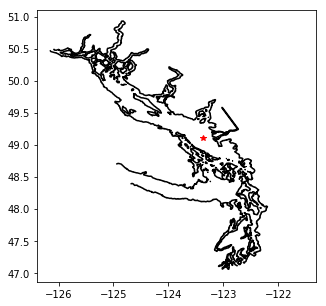

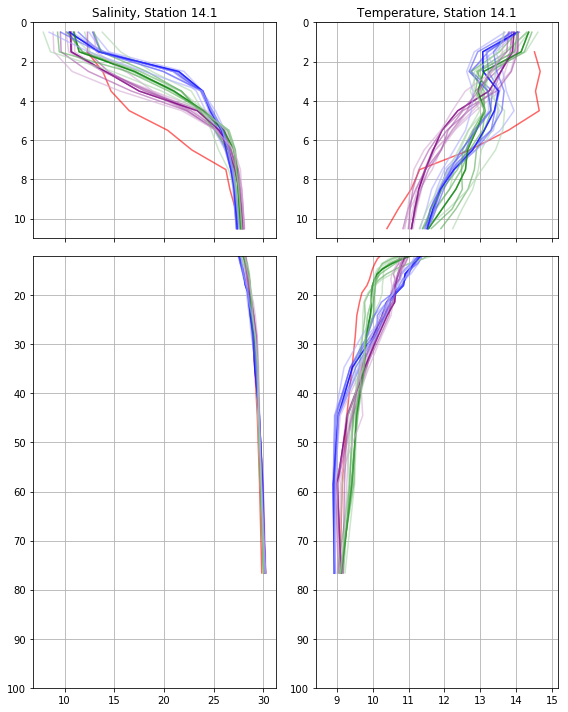

In [247]:
where(stationdata.iloc[[13]])
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

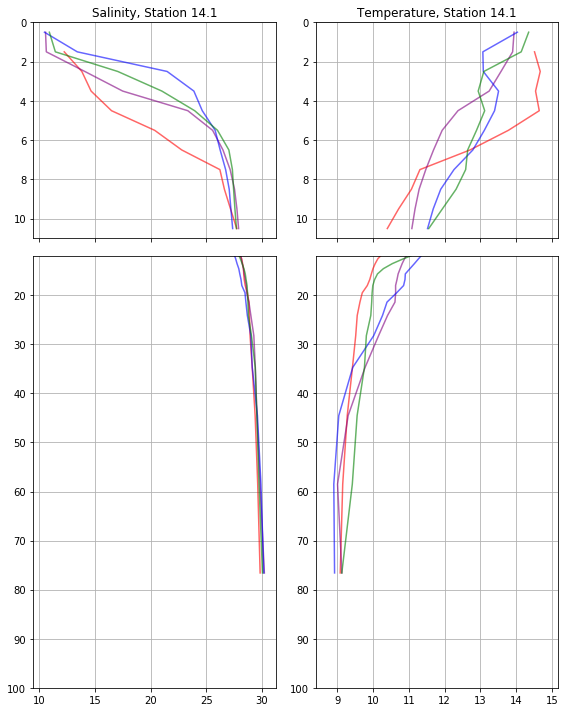

In [248]:
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])

pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

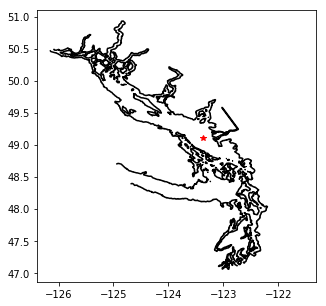

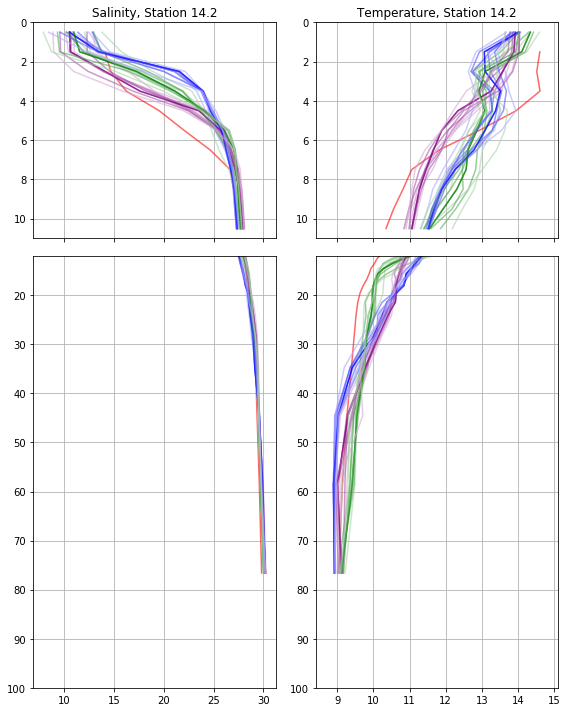

In [249]:
where(stationdata.iloc[[14]])
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

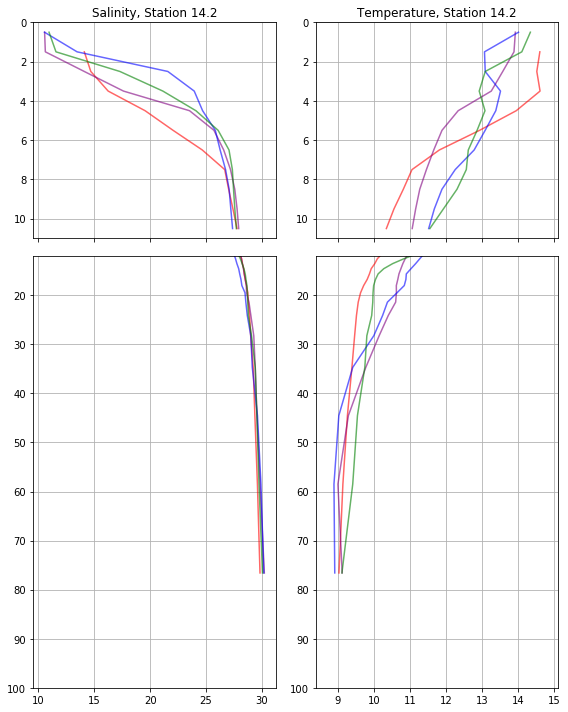

In [250]:
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
fig.tight_layout()

| Depth Level (m) |Base|    |      | Test A|     |      | Test B|     |      |Number of Points|
|-----------------|------------------|------------------|------------------|---|
|                 |Bias|RMSE|Willmott|Bias|RMSE|Willmott|Bias|RMSE|Willmott| |
|   a             | t  |f   |        |    |    |        |    |    |        | |
|   a             | t  |f   |        |    |    |        |    |    |        | |

In [222]:
for n in range(19):
    a = casts[stationdata['Station'].values[n]].uCast['depth_m'].values.shape[0]
    print(n,a)

0 11
1 3
2 26
3 26
4 25
5 25
6 25
7 26
8 10
9 22
10 25
11 26
12 26
13 10
14 26
15 27
16 25
17 8
18 12


In [503]:
ups_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
ups_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
for n in range(19):
    length_up = casts[stationdata['Station'].values[n]].uCast['depth_m'].values.shape[0]
    length_down = casts[stationdata['Station'].values[n]].dCast['depth_m'].values.shape[0]
    ups_sals = casts[stationdata['Station'].values[n]].uCast['gsw_srA0'].values
    down_sals = casts[stationdata['Station'].values[n]].dCast['gsw_srA0'].values
    ups_temps = casts[stationdata['Station'].values[n]].uCast['gsw_ctA0'].values
    down_temps = casts[stationdata['Station'].values[n]].dCast['gsw_ctA0'].values
    for m in range(length_up):
        ups_temperature[n,m].mask = False
        ups_salinity[n,m].mask = False
        ups_temperature[n,m] = ups_temps[m]
        ups_salinity[n,m] = ups_sals[m]
    for f in range(length_down):
        downs_temperature[n,f].mask = False
        downs_salinity[n,f].mask = False
        downs_temperature[n,f] = down_temps[f]
        downs_salinity[n,f] = down_sals[f] 

In [401]:
model_f_temp = np.ma.masked_array(np.zeros((9,27)), mask = True)
model_f_sal = np.ma.masked_array(np.zeros((9,27)), mask = True)
for n in range(9):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    f_sal = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                               +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_f_sal[n,m].mask = False
        model_f_sal[n,m] = f_sal[m]
    f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_f_temp[n,m].mask = False
        model_f_temp[n,m] = f_temp[m]

0
1
2
3
4
5
6
7
8


In [504]:
model_base_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_base_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_a_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_a_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_b_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_b_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
for n in range(19):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    if n ==13:
        shape_depth = cast.dCast['depth_m'].values.shape[0]
    else:
        shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    ups_temperature[n,:] = np.ma.masked_array(ups_temperature[n,:], mask = 1-tmask[0,:27,Yind,Xind])
    downs_temperature[n,:] = np.ma.masked_array(downs_temperature[n,:], mask = 1 - tmask[0,:27,Yind,Xind])
    ups_salinity[n,:] = np.ma.masked_array(ups_salinity[n, :], mask = 1- tmask[0,:27,Yind,Xind])
    downs_salinity[n,:] = np.ma.masked_array(downs_salinity[n,:], mask = 1 - tmask[0,:27,Yind,Xind])
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_sal[n,m].mask = False
        model_base_sal[n,m] = base_sal[m]
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_a_sal[n,m].mask = False
        model_a_sal[n,m] = a_sal[m]
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_b_sal[n,m].mask = False
        model_b_sal[n,m] = b_sal[m]
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_temp[n,m].mask = False
        model_base_temp[n,m] = base_temp[m]
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_a_temp[n,m].mask = False
        model_a_temp[n,m] = a_temp[m]
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_b_temp[n,m].mask = False
        model_b_temp[n,m] = b_temp[m]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [265]:
depths = casts[15].uCast['depth_m'].values

In [563]:
ctd_sals = np.ma.masked_array(np.zeros((38, 27)), mask = True)
ctd_temps = np.ma.masked_array(np.zeros((38,27)), mask = True)
for n in range(27):
    ctd_sals[:,n].mask = np.append(ups_salinity[:,n].mask, downs_salinity[:,n].mask)
    ctd_sals[:,n] = np.append(ups_salinity[:,n], downs_salinity[:,n])
    ctd_temps[:,n].mask = np.append(ups_temperature[:,n].mask, downs_temperature[:,n].mask)
    ctd_temps[:,n] = np.append(ups_temperature[:,n], downs_temperature[:,n])
ctd_sals = np.ma.masked_equal(ctd_sals, 0)
ctd_temps = np.ma.masked_equal(ctd_temps, 0)
ctd_sals = np.ma.masked_invalid(ctd_sals)
ctd_temps = np.ma.masked_invalid(ctd_temps)

In [506]:
apr30_ctd_sals = np.ma.masked_array(np.zeros((18, 27)), mask = True)
apr30_ctd_temps = np.ma.masked_array(np.zeros((18,27)), mask = True)
for n in range(27):
    apr30_ctd_sals[:,n].mask = np.append(ups_salinity[:9,n].mask, downs_salinity[:9,n].mask)
    apr30_ctd_sals[:,n] = np.append(ups_salinity[:9,n], downs_salinity[:9,n])
    apr30_ctd_temps[:,n].mask = np.append(ups_temperature[:9,n].mask, downs_temperature[:9,n].mask)
    apr30_ctd_temps[:,n] = np.append(ups_temperature[:9,n], downs_temperature[:9,n])
apr30_ctd_sals = np.ma.masked_equal(apr30_ctd_sals, 0)
apr30_ctd_temps = np.ma.masked_equal(apr30_ctd_temps, 0)
apr30_ctd_sals = np.ma.masked_invalid(apr30_ctd_sals)
apr30_ctd_temps = np.ma.masked_invalid(apr30_ctd_temps)

In [276]:
model_a_sal_full = np.zeros((38, 27))
model_a_temp_full = np.zeros((38,27))
model_b_sal_full = np.zeros((38, 27))
model_b_temp_full = np.zeros((38,27))
model_base_sal_full = np.zeros((38, 27))
model_base_temp_full = np.zeros((38,27))
for n in range(27):
    model_a_sal_full[:,n] = np.append(model_a_sal[:,n], model_a_sal[:,n])
    model_b_sal_full[:,n] = np.append(model_b_sal[:,n], model_b_sal[:,n])
    model_base_sal_full[:,n] = np.append(model_base_sal[:,n], model_base_sal[:,n])
    model_a_temp_full[:,n] = np.append(model_a_temp[:,n], model_a_temp[:,n])
    model_b_temp_full[:,n] = np.append(model_b_temp[:,n], model_b_temp[:,n])
    model_base_temp_full[:,n] = np.append(model_base_temp[:,n], model_base_temp[:,n])

In [408]:
model_f_sal_full = np.zeros((18, 27))
model_f_temp_full = np.zeros((18,27))
for n in range(27):
    model_f_sal_full[:,n] = np.append(model_f_sal[:,n], model_f_sal[:,n])
    model_f_temp_full[:,n] = np.append(model_f_temp[:,n], model_f_temp[:,n])

In [318]:
model_a_sal_full_masked = np.ma.masked_array(model_a_sal_full, ctd_sals.mask)
model_b_sal_full_masked = np.ma.masked_array(model_b_sal_full, ctd_sals.mask)
model_base_sal_full_masked = np.ma.masked_array(model_base_sal_full, ctd_sals.mask)
model_a_temp_full_masked = np.ma.masked_array(model_a_temp_full, ctd_temps.mask)
model_b_temp_full_masked = np.ma.masked_array(model_b_temp_full, ctd_temps.mask)
model_base_temp_full_masked = np.ma.masked_array(model_base_temp_full, ctd_temps.mask)

In [409]:
model_f_sal_full_masked = np.ma.masked_array(model_f_sal_full, apr30_ctd_sals.mask)
model_f_temp_full_masked = np.ma.masked_array(model_f_temp_full, apr30_ctd_temps.mask)

In [329]:
np.array([1-(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


array([        nan,  0.87375581,  0.95011033,  0.96059264,  0.9715941 ,
        0.99273165,  0.99639093,  0.9988791 ,  0.99899853,  0.99928105,
        0.99941253,  0.99959697,  0.9995632 ,  0.9996524 ,  0.99967997,
        0.99968025,  0.99965363,  0.99966211,  0.99980938,  0.99982768,
        0.90150811,  0.90231444,  0.9998223 ,  0.99973948,  0.99969407,
        0.99960717,  0.99972365])

In [564]:
for n in range(19):
    w, q = geo_tools.find_closest_model_point(stationdata.iloc[[n]]['LonDecDeg'].values[0],
                                              stationdata.iloc[[n]]['LatDecDeg'].values[0],
                                              X, Y, land_mask = bathy.mask)
    ctd_sals.mask[n, 20:22] = 1 - tmask[0,20:22,w, q]
    ctd_sals.mask[n+19, 20:22] = 1 - tmask[0,20:22,w, q]

In [565]:
base_bias_sal = np.array([np.ma.mean(model_base_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
base_RMSE_sal = np.array([np.sqrt(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_base_sal_full_masked[:,n].count()) for n in range(27)])
base_willmott_sal = np.array([1-(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
base_bias_temp = np.array([np.ma.mean(model_base_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
base_RMSE_temp = np.array([np.sqrt(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_base_temp_full_masked[:,n].count()) for n in range(27)])
base_willmott_temp = np.array([1-(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])
a_bias_sal = np.array([np.ma.mean(model_a_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
a_RMSE_sal = np.array([np.sqrt(np.sum((model_a_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_a_sal_full_masked[:,n].count()) for n in range(27)])
a_willmott_sal = np.array([1-(np.sum((model_a_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_a_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_a_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
a_bias_temp = np.array([np.ma.mean(model_a_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
a_RMSE_temp = np.array([np.sqrt(np.sum((model_a_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_a_temp_full_masked[:,n].count()) for n in range(27)])
a_willmott_temp = np.array([1-(np.sum((model_a_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_a_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_a_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])
b_bias_sal = np.array([np.ma.mean(model_b_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
b_RMSE_sal = np.array([np.sqrt(np.sum((model_b_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_b_sal_full_masked[:,n].count()) for n in range(27)])
b_willmott_sal = np.array([1-(np.sum((model_b_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_b_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_b_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
b_bias_temp = np.array([np.ma.mean(model_b_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
b_RMSE_temp = np.array([np.sqrt(np.sum((model_b_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_b_temp_full_masked[:,n].count()) for n in range(27)])
b_willmott_temp = np.array([1-(np.sum((model_b_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [566]:
f_bias_sal = np.array([np.ma.mean(model_f_sal_full_masked[:,n]) 
                      - np.ma.mean(apr30_ctd_sals[:,n]) for n in range(27)])
f_RMSE_sal = np.array([np.sqrt(np.sum((model_f_sal_full_masked[:,n] - apr30_ctd_sals[:,n])**2)
                     / model_f_sal_full_masked[:,n].count()) for n in range(27)])
f_willmott_sal = np.array([1-(np.sum((model_f_sal_full_masked[:,n] - apr30_ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_f_sal_full_masked[:,n] - 
                                            np.mean(apr30_ctd_sals[:,n])) + 
                                     np.abs(model_f_sal_full_masked[:,n] - 
                                            np.mean(apr30_ctd_sals[:,n])))**2)) 
                           for n in range(27)])
f_bias_temp = np.array([np.ma.mean(model_f_temp_full_masked[:,n]) 
                      - np.ma.mean(apr30_ctd_temps[:,n]) for n in range(27)])
f_RMSE_temp = np.array([np.sqrt(np.sum((model_f_temp_full_masked[:,n] - apr30_ctd_temps[:,n])**2)
                     / model_f_temp_full_masked[:,n].count()) for n in range(27)])
f_willmott_temp = np.array([1-(np.sum((model_f_temp_full_masked[:,n] - apr30_ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_f_temp_full_masked[:,n] - 
                                            np.mean(apr30_ctd_temps[:,n])) + 
                                     np.abs(model_f_temp_full_masked[:,n] - 
                                            np.mean(apr30_ctd_temps[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [567]:
number_of_samples = np.array([ctd_sals[:,n].count() for n in range(27)])

In [568]:
number_of_samples_apr30 = np.array([apr30_ctd_sals[:,n].count() for n in range(27)])

In [569]:
a = pd.DataFrame()
a = a.assign(depth_m = depths)
b = a.assign(base_case_bias_sal = base_bias_sal)
b = b.assign(base_case_rmse_sal = base_RMSE_sal)
b = b.assign(base_case_willmott_sal = base_willmott_sal)
b = b.assign(testa_bias_sal = a_bias_sal)
b = b.assign(testa_rmse_sal = a_RMSE_sal)
b = b.assign(testa_willmott_sal = a_willmott_sal)
b = b.assign(testb_bias_sal = b_bias_sal)
b = b.assign(testb_rmse_sal = b_RMSE_sal)
b = b.assign(testb_willmott_sal = b_willmott_sal)
b = b.assign(base_case_bias_temp = base_bias_temp)
b = b.assign(base_case_rmse_temp = base_RMSE_temp)
b = b.assign(base_case_willmott_temp = base_willmott_temp)
b = b.assign(testa_bias_temp = a_bias_temp)
b = b.assign(testa_RMSE_temp = a_RMSE_temp)
b = b.assign(testa_willmott_temp = a_willmott_temp)
b = b.assign(testb_bias_temp = b_bias_temp)
b = b.assign(testb_rmse_temp = b_RMSE_temp)
b = b.assign(testb_willmott_temp = b_willmott_temp)
b = b.assign(number_of_points = number_of_samples)
b = b.assign(testf_bias_sal = f_bias_sal)
b = b.assign(testf_rmse_sal = f_RMSE_sal)
b = b.assign(testf_willmott_sal = f_willmott_sal)
b = b.assign(testf_bias_temp = f_bias_temp)
b = b.assign(testf_RMSE_temp = f_RMSE_temp)
b = b.assign(testf_willmott_temp = f_willmott_temp)
b = b.assign(apr30_number_of_points = number_of_samples_apr30)

In [570]:
b.keys()

Index(['depth_m', 'base_case_bias_sal', 'base_case_rmse_sal',
       'base_case_willmott_sal', 'testa_bias_sal', 'testa_rmse_sal',
       'testa_willmott_sal', 'testb_bias_sal', 'testb_rmse_sal',
       'testb_willmott_sal', 'base_case_bias_temp', 'base_case_rmse_temp',
       'base_case_willmott_temp', 'testa_bias_temp', 'testa_RMSE_temp',
       'testa_willmott_temp', 'testb_bias_temp', 'testb_rmse_temp',
       'testb_willmott_temp', 'number_of_points', 'testf_bias_sal',
       'testf_rmse_sal', 'testf_willmott_sal', 'testf_bias_temp',
       'testf_RMSE_temp', 'testf_willmott_temp', 'apr30_number_of_points'],
      dtype='object')

In [571]:
b[['depth_m', 'base_case_bias_sal', 'testa_bias_sal', 'testb_bias_sal', 'number_of_points',
  'testf_bias_sal', 'apr30_number_of_points']]

depth_m  base_case_bias_sal  testa_bias_sal  testb_bias_sal  \
0    0.500000                 NaN             NaN             NaN   
1    1.500003           -0.051385        0.864706        0.826046   
2    2.500011           -0.249919        1.101329        0.460371   
3    3.500031           -0.665700        0.847121       -0.071820   
4    4.500071           -0.324776        0.628023       -0.303029   
5    5.500151           -0.003584        0.563468        0.192933   
6    6.500310            0.055374        0.393669        0.341287   
7    7.500623            0.042456        0.152504        0.181325   
8    8.501236            0.059540       -0.031672        0.026033   
9    9.502433           -0.029757       -0.153818       -0.063213   
10  10.504766           -0.073085       -0.202525       -0.103678   
11  11.509312           -0.041099       -0.149658       -0.071717   
12  12.518167           -0.071128       -0.153494       -0.058260   
13  13.535412           -0.083069       -0.131442       -0.013851   
14  14.568982           -0.054203       -0.093553        0.041476   
15  15.634288           -0.017366       -0.051006        0.082160   
16  16.761173           -0.002345       -0.023004        0.100081   
17  18.007135            0.014253       -0.014013        0.106453   
18  19.481785            0.058847        0.023654        0.129921   
19  21.389978            0.083947        0.049021        0.156139   
20  24.100256            0.083002        0.050406        0.090145   
21  28.229916            0.162140        0.177114        0.147852   
22  34.685757            0.245856        0.256248        0.233012   
23  44.517723            0.298620        0.323219        0.243885   
24  58.484333            0.329334        0.314730        0.248973   
25  76.585587            0.394153        0.360186        0.284565   
26  98.062958            0.354314        0.415463        0.247781   

    number_of_points  testf_bias_sal  apr30_number_of_points  
0                  0             NaN                       0  
1                 32       -7.478673                      16  
2                 36      -10.138234                      18  
3                 34      -13.588538                      16  
4                 34      -14.374790                      16  
5                 34      -15.094666                      16  
6                 34      -15.478025                      16  
7                 34      -15.822146                      16  
8                 32      -16.076542                      16  
9                 32      -16.267273                      16  
10                30      -15.882985                      14  
11                28      -19.657189                      12  
12                26      -19.763053                      12  
13                26      -19.845832                      12  
14                26      -19.911002                      12  
15                26      -19.970701                      12  
16                26      -20.017228                      12  
17                26      -20.058131                      12  
18                26      -20.124167                      12  
19                26      -20.196138                      12  
20                26      -20.294163                      12  
21                26      -20.413071                      12  
22                24      -20.569443                      12  
23                24      -20.750094                      12  
24                24      -20.897043                      12  
25                14      -21.045401                       6  
26                 2             NaN                       0

In [572]:
b[['depth_m', 'base_case_rmse_sal', 'testa_rmse_sal', 'testb_rmse_sal', 'number_of_points',
  'testf_rmse_sal', 'apr30_number_of_points']]

depth_m  base_case_rmse_sal  testa_rmse_sal  testb_rmse_sal  \
0    0.500000                 NaN             NaN             NaN   
1    1.500003            4.934970        5.748507        5.092769   
2    2.500011            3.782849        4.509342        3.592548   
3    3.500031            3.591503        4.341158        3.739815   
4    4.500071            3.221485        2.517081        3.023078   
5    5.500151            1.686796        1.634972        1.523812   
6    6.500310            1.233913        1.204662        1.267382   
7    7.500623            0.707717        0.746514        0.821124   
8    8.501236            0.690651        0.565502        0.684813   
9    9.502433            0.593712        0.505057        0.581555   
10  10.504766            0.542106        0.497982        0.523299   
11  11.509312            0.420147        0.405147        0.384210   
12  12.518167            0.401126        0.398056        0.333336   
13  13.535412            0.361047        0.379498        0.301593   
14  14.568982            0.349090        0.367743        0.312032   
15  15.634288            0.351522        0.339034        0.303390   
16  16.761173            0.369012        0.318918        0.278404   
17  18.007135            0.367027        0.294950        0.245346   
18  19.481785            0.276974        0.261581        0.242263   
19  21.389978            0.264953        0.272694        0.247414   
20  24.100256            0.208405        0.234196        0.193565   
21  28.229916            0.228542        0.252954        0.202918   
22  34.685757            0.277460        0.305646        0.248175   
23  44.517723            0.340625        0.362364        0.260989   
24  58.484333            0.374919        0.366361        0.282792   
25  76.585587            0.428726        0.391539        0.294981   
26  98.062958            0.354320        0.415469        0.247790   

    number_of_points  testf_rmse_sal  apr30_number_of_points  
0                  0             NaN                       0  
1                 32       11.662464                      16  
2                 36       13.729439                      18  
3                 34       15.683068                      16  
4                 34       16.481096                      16  
5                 34       17.227382                      16  
6                 34       17.610828                      16  
7                 34       17.951596                      16  
8                 32       18.178842                      16  
9                 32       18.344106                      16  
10                30       18.255396                      14  
11                28       19.658020                      12  
12                26       19.763704                      12  
13                26       19.846503                      12  
14                26       19.911458                      12  
15                26       19.971022                      12  
16                26       20.017580                      12  
17                26       20.058580                      12  
18                26       20.124653                      12  
19                26       20.196593                      12  
20                26       20.294571                      12  
21                26       20.413401                      12  
22                24       20.569875                      12  
23                24       20.750417                      12  
24                24       20.897345                      12  
25                14       21.045723                       6  
26                 2             NaN                       0

In [573]:
b[['depth_m', 'base_case_willmott_sal', 'testa_willmott_sal', 'testb_willmott_sal', 
   'number_of_points','testf_willmott_sal', 'apr30_number_of_points']]

depth_m  base_case_willmott_sal  testa_willmott_sal  testb_willmott_sal  \
0    0.500000                     NaN                 NaN                 NaN   
1    1.500003                0.943341            0.933577            0.941332   
2    2.500011                0.966569            0.956138            0.968490   
3    3.500031                0.962236            0.946141            0.957912   
4    4.500071                0.967269            0.978971            0.970540   
5    5.500151                0.990663            0.991232            0.992295   
6    6.500310                0.995097            0.995356            0.994853   
7    7.500623                0.998421            0.998257            0.997894   
8    8.501236                0.998609            0.999062            0.998629   
9    9.502433                0.998983            0.999259            0.999022   
10  10.504766                0.999201            0.999320            0.999254   
11  11.509312                0.999171            0.999225            0.999305   
12  12.518167                0.812819            0.861926            0.819336   
13  13.535412                0.856047            0.866995            0.850485   
14  14.568982                0.875817            0.864008            0.836501   
15  15.634288                0.876670            0.863976            0.844404   
16  16.761173                0.877982            0.872139            0.852835   
17  18.007135                0.880218            0.880665            0.876111   
18  19.481785                0.898485            0.880924            0.882987   
19  21.389978                0.891671            0.857864            0.880983   
20  24.100256                0.999821            0.999774            0.999846   
21  28.229916                0.999788            0.999741            0.999833   
22  34.685757                0.823933            0.798323            0.871698   
23  44.517723                0.732931            0.740620            0.831250   
24  58.484333                0.690576            0.680935            0.755427   
25  76.585587                0.711669            0.709822            0.751272   
26  98.062958                0.749991            0.749993            0.749982   

    number_of_points  testf_willmott_sal  apr30_number_of_points  
0                  0                 NaN                       0  
1                 32            0.417773                      16  
2                 36            0.551465                      18  
3                 34            0.669507                      16  
4                 34            0.673206                      16  
5                 34            0.675499                      16  
6                 34            0.677207                      16  
7                 34            0.678808                      16  
8                 32            0.680867                      16  
9                 32            0.682567                      16  
10                30            0.670280                      14  
11                28            0.749983                      12  
12                26            0.749988                      12  
13                26            0.749989                      12  
14                26            0.749994                      12  
15                26            0.749997                      12  
16                26            0.749997                      12  
17                26            0.749996                      12  
18                26            0.749995                      12  
19                26            0.749995                      12  
20                26            0.749998                      12  
21                26            0.750000                      12  
22                24            0.749997                      12  
23                24            0.750002                      12  
24                24            0.750003                      

In [574]:
b[['depth_m', 'base_case_bias_temp', 'testa_bias_temp', 'testb_bias_temp', 'number_of_points',
  'testf_bias_temp', 'apr30_number_of_points']]

depth_m  base_case_bias_temp  testa_bias_temp  testb_bias_temp  \
0    0.500000                  NaN              NaN              NaN   
1    1.500003             0.164738         0.139364         0.154314   
2    2.500011             0.091484         0.021447         0.058413   
3    3.500031            -0.031991        -0.023897         0.061219   
4    4.500071             0.106683         0.185554         0.289908   
5    5.500151             0.169458         0.281329         0.352645   
6    6.500310             0.151244         0.226743         0.254306   
7    7.500623             0.198646         0.208733         0.261784   
8    8.501236             0.226589         0.244299         0.276946   
9    9.502433             0.276480         0.296669         0.245733   
10  10.504766             0.337553         0.335909         0.230407   
11  11.509312             0.332252         0.291759         0.181509   
12  12.518167             0.423315         0.343413         0.223738   
13  13.535412             0.443756         0.328475         0.191709   
14  14.568982             0.431488         0.306001         0.150840   
15  15.634288             0.415377         0.266804         0.133864   
16  16.761173             0.425948         0.260014         0.120075   
17  18.007135             0.415816         0.254863         0.114895   
18  19.481785             0.363389         0.200570         0.107158   
19  21.389978             0.365120         0.159886         0.110794   
20  24.100256            -0.516689        -0.661632        -0.642406   
21  28.229916            -0.591496        -0.728270        -0.642558   
22  34.685757             0.069763        -0.096656         0.033354   
23  44.517723            -0.089889        -0.178362        -0.061651   
24  58.484333            -0.203695        -0.228579        -0.176626   
25  76.585587            -0.165953        -0.211003        -0.146131   
26  98.062958            -0.403424        -0.309456        -0.158988   

    number_of_points  testf_bias_temp  apr30_number_of_points  
0                  0              NaN                       0  
1                 32         1.743276                      16  
2                 36         1.805235                      18  
3                 34         1.882151                      16  
4                 34         1.633053                      16  
5                 34         1.261937                      16  
6                 34         1.113012                      16  
7                 34         0.951927                      16  
8                 32         0.858187                      16  
9                 32         0.797967                      16  
10                30         0.742130                      14  
11                28         0.692741                      12  
12                26         0.681705                      12  
13                26         0.683275                      12  
14                26         0.672317                      12  
15                26         0.662191                      12  
16                26         0.649774                      12  
17                26         0.645225                      12  
18                26         0.637857                      12  
19                26         0.636800                      12  
20                26         0.647432                      12  
21                26         0.637772                      12  
22                24         0.559598                      12  
23                24         0.461172                      12  
24                24         0.420219                      12  
25                14         0.501457                       6  
26                 2              NaN                       0

In [575]:
b[['depth_m', 'base_case_rmse_temp', 'testa_RMSE_temp', 'testb_rmse_temp', 'number_of_points',
  'testf_RMSE_temp', 'apr30_number_of_points']]

depth_m  base_case_rmse_temp  testa_RMSE_temp  testb_rmse_temp  \
0    0.500000                  NaN              NaN              NaN   
1    1.500003             0.843150         0.889717         0.875354   
2    2.500011             0.809997         0.822686         0.834022   
3    3.500031             0.718240         0.655104         0.736489   
4    4.500071             0.786774         0.642938         0.751507   
5    5.500151             0.701156         0.720605         0.765690   
6    6.500310             0.501500         0.560222         0.582110   
7    7.500623             0.495239         0.521511         0.631758   
8    8.501236             0.531782         0.540044         0.606747   
9    9.502433             0.573521         0.602173         0.567274   
10  10.504766             0.622191         0.645984         0.549267   
11  11.509312             0.621750         0.621035         0.457100   
12  12.518167             0.670877         0.619661         0.408813   
13  13.535412             0.699856         0.603760         0.351491   
14  14.568982             0.702647         0.589568         0.310405   
15  15.634288             0.700900         0.528128         0.289015   
16  16.761173             0.719689         0.521434         0.277443   
17  18.007135             0.714034         0.509654         0.275072   
18  19.481785             0.613948         0.446029         0.270645   
19  21.389978             0.622413         0.396692         0.279197   
20  24.100256             2.822558         2.803663         2.799403   
21  28.229916             2.802304         2.782412         2.791968   
22  34.685757             0.311965         0.201748         0.265719   
23  44.517723             0.331536         0.314068         0.335332   
24  58.484333             0.382016         0.343298         0.353553   
25  76.585587             0.244584         0.244839         0.253461   
26  98.062958             0.403425         0.309457         0.158990   

    number_of_points  testf_RMSE_temp  apr30_number_of_points  
0                  0              NaN                       0  
1                 32         1.963884                      16  
2                 36         1.968212                      18  
3                 34         1.969410                      16  
4                 34         1.699520                      16  
5                 34         1.299208                      16  
6                 34         1.129555                      16  
7                 34         0.960753                      16  
8                 32         0.870499                      16  
9                 32         0.817714                      16  
10                30         0.762670                      14  
11                28         0.704700                      12  
12                26         0.690373                      12  
13                26         0.690033                      12  
14                26         0.678355                      12  
15                26         0.668220                      12  
16                26         0.656527                      12  
17                26         0.653875                      12  
18                26         0.647750                      12  
19                26         0.647723                      12  
20                26         0.664279                      12  
21                26         0.658471                      12  
22                24         0.585783                      12  
23                24         0.493264                      12  
24                24         0.449683                      12  
25                14         0.535048                       6  
26                 2              NaN                       0

In [576]:
b[['depth_m', 'base_case_willmott_temp', 'testa_willmott_temp', 'testb_willmott_temp', 
   'number_of_points','testf_willmott_temp', 'apr30_number_of_points']]

depth_m  base_case_willmott_temp  testa_willmott_temp  \
0    0.500000                      NaN                  NaN   
1    1.500003                 0.969832             0.963682   
2    2.500011                 0.971045             0.966758   
3    3.500031                 0.972996             0.977460   
4    4.500071                 0.964308             0.977889   
5    5.500151                 0.967483             0.970467   
6    6.500310                 0.981116             0.978827   
7    7.500623                 0.979972             0.978452   
8    8.501236                 0.976112             0.976140   
9    9.502433                 0.971179             0.969573   
10  10.504766                 0.965086             0.963688   
11  11.509312                 0.958977             0.959274   
12  12.518167                 0.945399             0.949934   
13  13.535412                 0.939698             0.948318   
14  14.568982                 0.937444             0.947198   
15  15.634288                 0.934357             0.951829   
16  16.761173                 0.927531             0.949059   
17  18.007135                 0.923639             0.947062   
18  19.481785                 0.932237             0.951844   
19  21.389978                 0.925592             0.955765   
20  24.100256                 0.719520             0.715188   
21  28.229916                 0.712309             0.707758   
22  34.685757                 0.952369             0.967882   
23  44.517723                 0.928045             0.921292   
24  58.484333                 0.906126             0.903377   
25  76.585587                 0.950899             0.943922   
26  98.062958                 0.749999             0.749999   

    testb_willmott_temp  number_of_points  testf_willmott_temp  \
0                   NaN                 0                  NaN   
1              0.966361                32             0.825024   
2              0.967365                36             0.825123   
3              0.973120                34             0.804043   
4              0.972698                34             0.811387   
5              0.968694                34             0.823365   
6              0.977841                34             0.829480   
7              0.970896                34             0.834785   
8              0.971111                32             0.837075   
9              0.970733                32             0.838340   
10             0.969233                30             0.849356   
11             0.973352                28             0.745072   
12             0.971108                26             0.747819   
13             0.975622                26             0.749670   
14             0.978287                26             0.750057   
15             0.979221                26             0.750447   
16             0.978959                26             0.750295   
17             0.977880                26             0.749857   
18             0.976842                26             0.748849   
19             0.973778                26             0.748194   
20             0.715166                26             0.744884   
21             0.710156                26             0.741539   
22             0.961905                24             0.736737   
23             0.931284                24             0.735571   
24             0.916393                24             0.740336   
25             0.952266                14             0.726249   
26             0.749995                 2                  NaN   

    apr30_number_of_points  
0                        0  
1                       16  
2                       18  
3                       16  
4                       16  
5                       16  
6                       16  
7                       16  
8                       16  
9                       16  
10                      14  
11                      12  
12             

In [479]:
def plot_plume_salinity(file, ax):
    t = ax.pcolormesh(np.ma.masked_array(file.variables['vosaline'][19, 0, ...],
                                         mask = 1 - tmask[0,0,...]),
                      cmap = cmocean.cm.haline)
    fig.colorbar(t, ax=ax)
    ax.set_ylim(300,600)
    ax.set_xlim(150,400)
    return ax

In [432]:
apr10base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
apr10testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
apr10testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        
may31base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
may31testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
may31testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')        

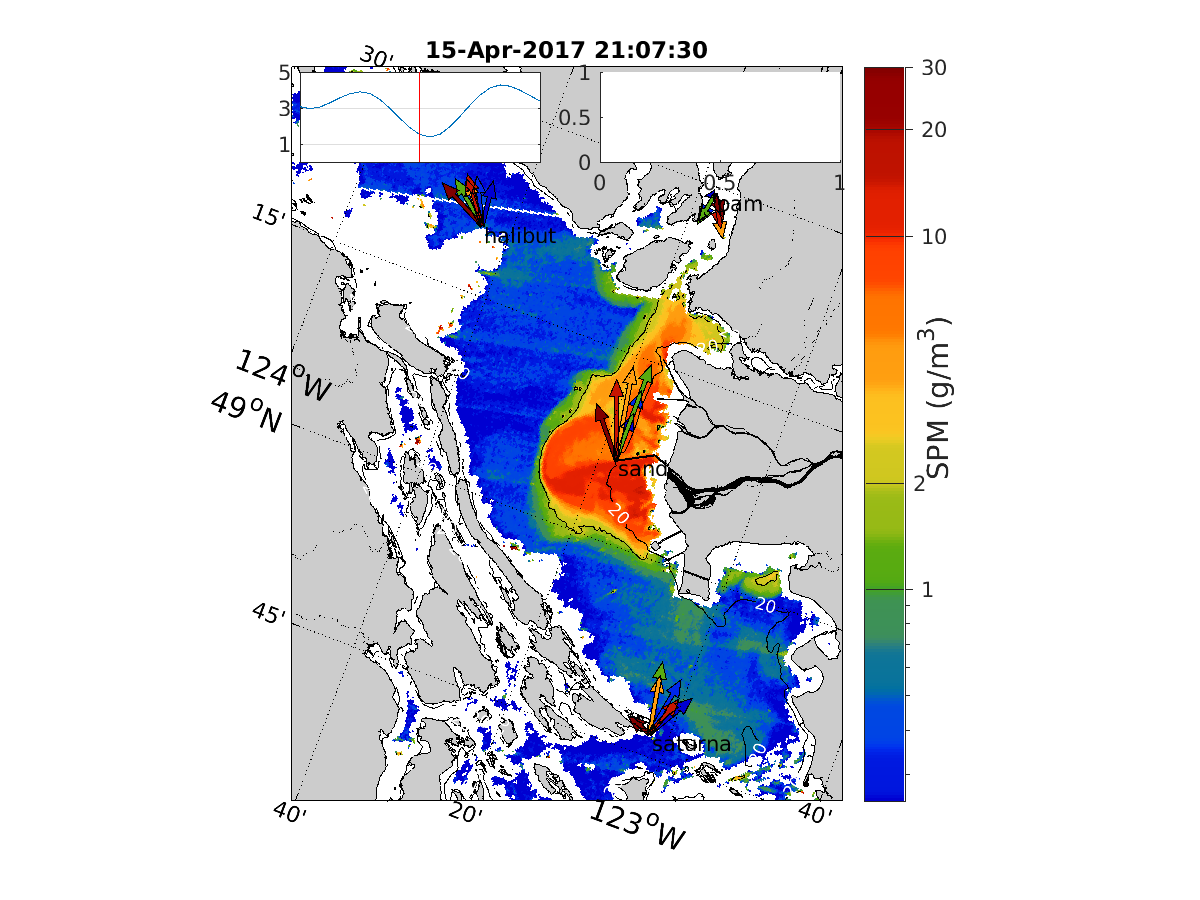

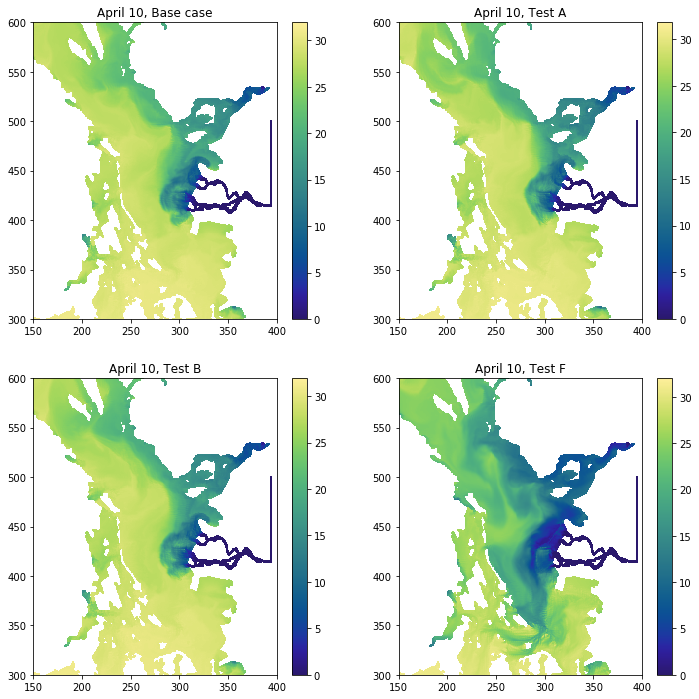

In [482]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
q = plot_plume_salinity(apr10base, ax[0,0])
q.set_title('April 10, Base case')
w = plot_plume_salinity(apr10testa, ax[0,1])
w.set_title('April 10, Test A')
e = plot_plume_salinity(apr10testb, ax[1,0])
e.set_title('April 10, Test B')
r = plot_plume_salinity(f, ax[1,1])
r.set_title('April 10, Test F')
Image('/home/vdo/Downloads/plume1.png')

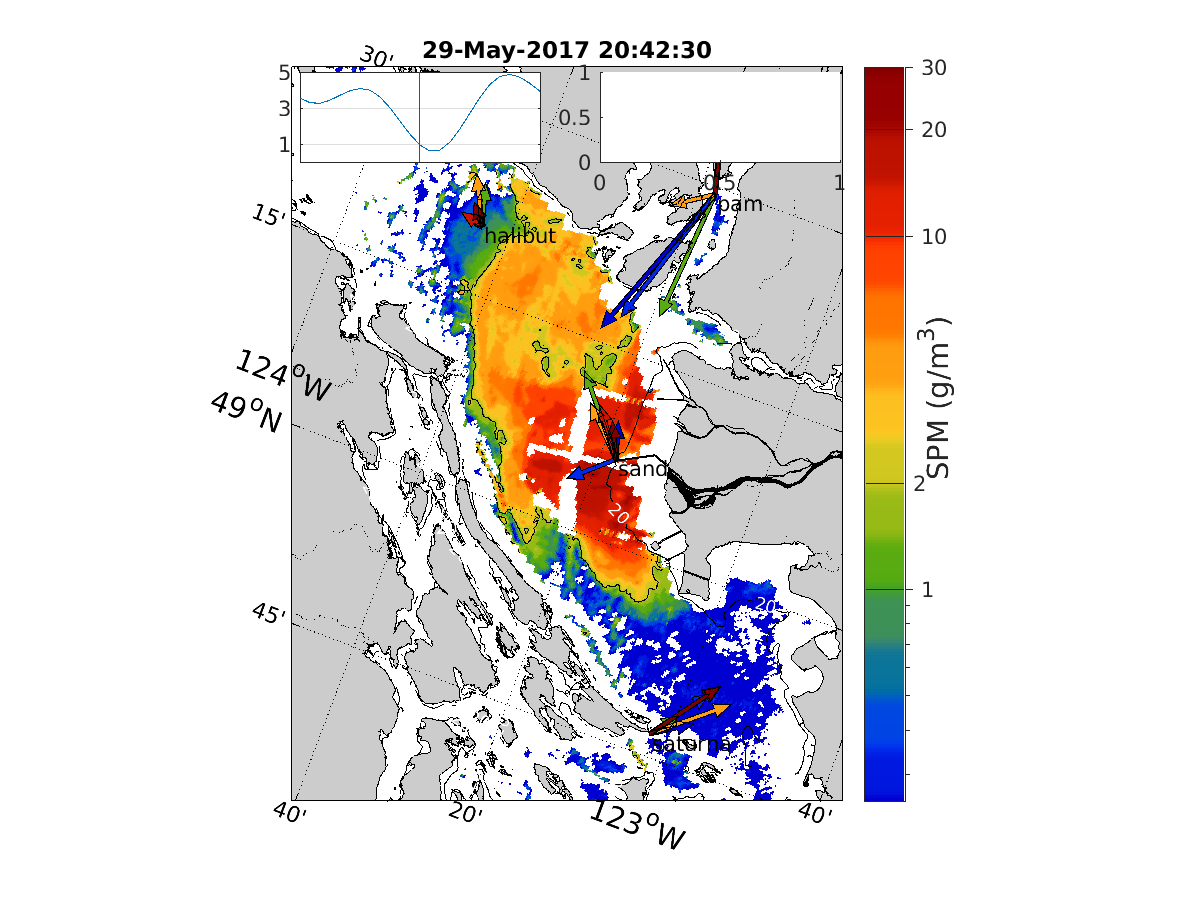

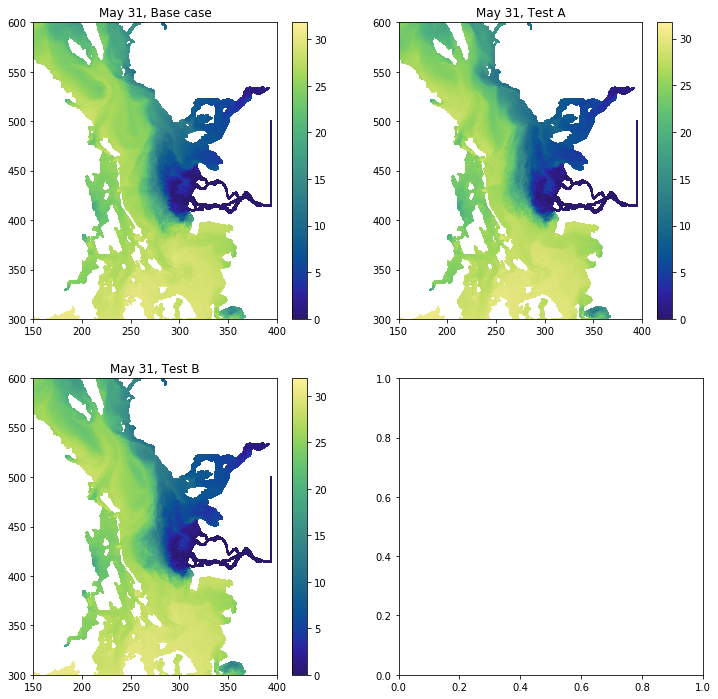

In [495]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
y = plot_plume_salinity(may31base, ax[0,0])
y.set_title('May 31, Base case')
u = plot_plume_salinity(may31testa, ax[0,1])
u.set_title('May 31, Test A')
i = plot_plume_salinity(may31testb, ax[1,0])
i.set_title('May 31, Test B')
Image('/home/vdo/Downloads/plume2.png')

In [542]:
for n in range(19):
    w, q = geo_tools.find_closest_model_point(stationdata.iloc[[n]]['LonDecDeg'].values[0],
                                              stationdata.iloc[[n]]['LatDecDeg'].values[0],
                                              X, Y, land_mask = bathy.mask)
    ctd_sals.mask[n, 20:22] = 1 - tmask[0,20:22,w, q]
    ctd_sals.mask[n+19, 20:22] = 1 - tmask[0,20:22,w, q]

In [543]:
np.mean(ctd_sals[:,20]) - np.mean(model_a_sal_full_masked[:,20])

-0.050406163275237503

In [540]:
ctd_sals.shape

(38, 27)